In [14]:
import pandas as pd
import numpy as np

In [2]:
care_df=pd.read_csv("./train/care.csv")

In [3]:
diagnosis_df=pd.read_csv("./train/diagnosis.csv")

In [4]:
patient_df=pd.read_csv("./train/patient.csv")

In [5]:
visit_df=pd.read_csv("./train/visit.csv")

In [6]:
combined_df = care_df.merge(diagnosis_df, on='patient_id', how='inner') \
                 .merge(patient_df, on='patient_id', how='inner') \
                 .merge(visit_df, on='patient_id', how='inner')


In [7]:
risk_df=pd.read_csv("./train/risk.csv")

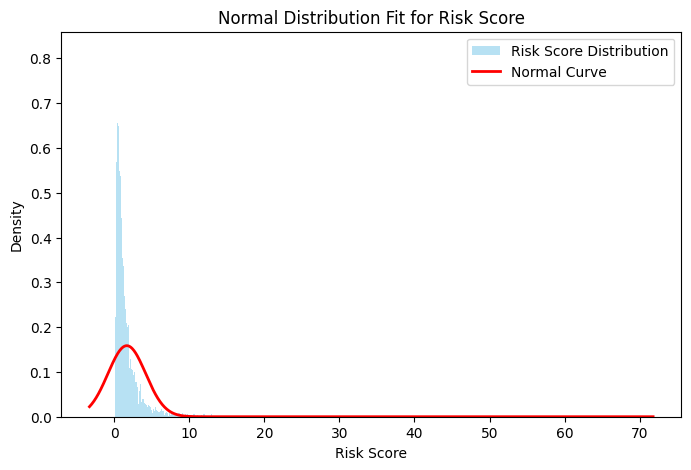

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Drop NaN values from risk_score if any
data = risk_df['risk_score'].dropna()

# Compute mean and standard deviation
mu, std = data.mean(), data.std()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=1000, density=True, alpha=0.6, color='skyblue', label='Risk Score Distribution')

# Plot normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal Curve')

# Labels
plt.title('Normal Distribution Fit for Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [9]:
merged_df = pd.merge(diagnosis_df, risk_df, on='patient_id', how='inner')

In [10]:
# Step 1: Get patient IDs where hot_spotter_chronic_flag == 't'
chronic_patients = patient_df.loc[
    patient_df['hot_spotter_chronic_flag'] == 't',
    'patient_id'
]

# Step 2: Filter risk_df for those patient IDs
chronic_risk_scores = risk_df[risk_df['patient_id'].isin(chronic_patients)]

# Step 3 (optional): Display only relevant columns
chronic_risk_scores = chronic_risk_scores[['patient_id', 'risk_score']]

# Step 4: See result
print(chronic_risk_scores)


      patient_id  risk_score
192         2265        7.03
227         2624        5.52
280         3264        4.31
389         4252        1.27
433         4623        2.90
...          ...         ...
7567       78284        1.66
7727       79535        2.13
7789       79189        2.93
7827       80668        9.29
7924       80405        0.73

[131 rows x 2 columns]


In [11]:
chronic_patients = patient_df.loc[
    patient_df['hot_spotter_readmission_flag'] == 't',
    'patient_id'
]

# Step 2: Filter risk_df for those patient IDs
chronic_risk_scores = risk_df[risk_df['patient_id'].isin(chronic_patients)]

# Step 3 (optional): Display only relevant columns
chronic_risk_scores = chronic_risk_scores[['patient_id', 'risk_score']]

# Step 4: See result
print(chronic_risk_scores)

      patient_id  risk_score
437         4650        1.16
4662       48236       26.73
6602       68611        1.00


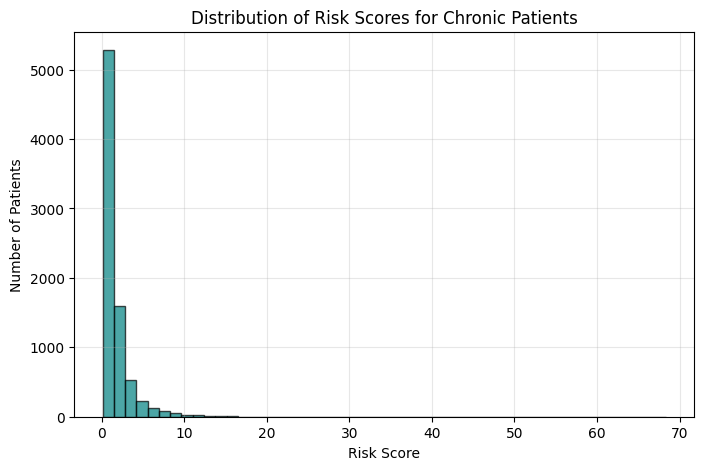

In [12]:
import matplotlib.pyplot as plt

# Assuming you already have chronic_risk_scores from earlier
plt.figure(figsize=(8,5))
plt.hist(risk_df['risk_score'], bins=50, color='teal', alpha=0.7, edgecolor='black')

# Labels and title
plt.title('Distribution of Risk Scores for Chronic Patients')
plt.xlabel('Risk Score')
plt.ylabel('Number of Patients')
plt.grid(alpha=0.3)
plt.show()


In [15]:
from scipy import stats
z = np.abs(stats.zscore(risk_df['risk_score']))
risk_df[z > 3]


,patient_id,risk_score
2,310,11.70
116,1536,16.43
130,1683,15.92
148,1810,13.79
182,2161,13.55
...,...,...
7555,78165,12.65
7817,80315,9.72
7820,80345,10.26
7827,80668,9.29


In [16]:
care_df['care_count_per_patient'] = care_df.groupby('patient_id')['care_id'].transform('count')


In [17]:
care_df_new=care_df.drop('care_id',axis=1)

In [19]:
care_df_new=care_df.drop(['last_care_dt','next_care_dt'],axis=1)

In [20]:
care_df_new=care_df_new.drop('care_id',axis=1)

In [21]:
# Filter only LAB_TEST rows
lab_test_df = care_df_new[care_df_new['msrmnt_type'] == 'LAB TEST']

# Get all unique subtypes
subtypes = lab_test_df['msrmnt_sub_type'].unique()

# Create a column for each LAB_TEST subtype (1 if that subtype exists for the patient, else 0)
for subtype in subtypes:
    care_df_new[f'LAB_TEST_{subtype}'] = care_df_new.apply(
        lambda x: x['msrmnt_value'] if (x['msrmnt_type'] == 'LAB TEST' and x['msrmnt_sub_type'] == subtype) else 0,
        axis=1
    )
care_df_new

,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,care_gap_ind,care_count_per_patient,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE
0,186,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0
1,197,LAB TEST,HbA1c,6.5,t,1,6.5,0.0,0.0
2,449,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0
3,1536,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0
4,1552,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
420,81702,SCREENING,COLORECTAL CANCER,0.0,t,2,0.0,0.0,0.0
421,81798,SCREENING,COLORECTAL CANCER,0.0,t,2,0.0,0.0,0.0
422,81798,SCREENING,BREAST CANCER,0.0,t,2,0.0,0.0,0.0
423,81827,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0


In [22]:
# Separate LAB TEST rows
lab_test_rows = care_df_new[care_df_new['msrmnt_type'] == 'LAB TEST']

# Keep only non-lab rows for encoding
non_lab_rows = care_df_new[care_df_new['msrmnt_type'] != 'LAB TEST']

# Perform one-hot encoding on non-lab rows
encoded_df = pd.get_dummies(non_lab_rows, columns=['msrmnt_sub_type'], prefix='SUBTYPE')

# Combine back with LAB TEST rows
care_df_new = pd.concat([encoded_df, lab_test_rows], ignore_index=True)


In [23]:
care_df_new = care_df_new.drop(columns=['msrmnt_sub_type','msrmnt_type','msrmnt_value'])


In [24]:
cols = [
    'SUBTYPE_BREAST CANCER',
    'SUBTYPE_CHOLESTEROL',
    'SUBTYPE_COLORECTAL CANCER',
    'SUBTYPE_DIABETES',
    'SUBTYPE_HYPERTENSION'
]

care_df_new[cols] = care_df_new[cols].fillna(False)


/tmp/ipykernel_28417/3862260571.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  care_df_new[cols] = care_df_new[cols].fillna(False)


In [25]:
diagnosis_df['diagnosis_count_per_patient'] = diagnosis_df.groupby('patient_id')['diagnosis_id'].transform('count')

In [26]:
diagnosis_df = pd.get_dummies(diagnosis_df, columns=['condition_name'], prefix='COND')


In [27]:
diagnosis_df_new=diagnosis_df.drop(['diagnosis_id','condition_type','condition_description','is_chronic'],axis=1)

In [28]:
visit_counts = (
    visit_df
    .groupby(['patient_id', 'visit_type'])
    .size()
    .unstack(fill_value=0)
    .add_prefix('VISIT_')
    .reset_index()
)


In [29]:
visit_counts

visit_type,patient_id,VISIT_ER,VISIT_INPATIENT,VISIT_URGENT CARE
0,80,1,0,4
1,98,0,0,1
2,110,2,0,4
3,125,0,0,1
4,161,1,0,0
...,...,...,...,...
3082,82056,1,0,2
3083,82060,1,0,2
3084,82098,2,0,0
3085,82117,0,0,1


In [30]:
# 1️⃣ Convert to datetime
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])
visit_df['visit_end_dt'] = pd.to_datetime(visit_df['visit_end_dt'])

# 2️⃣ Calculate number of days per visit
visit_df['visit_days'] = (visit_df['visit_end_dt'] - visit_df['visit_start_dt']).dt.days + 1

# 3️⃣ Get number of visits per patient per type
visit_counts = (
    visit_df
    .groupby(['patient_id', 'visit_type'])
    .size()
    .unstack(fill_value=0)
    .add_prefix('VISIT_COUNT_')
)

# 4️⃣ Get total days per patient per type
visit_days = (
    visit_df
    .groupby(['patient_id', 'visit_type'])['visit_days']
    .sum()
    .unstack(fill_value=0)
    .add_prefix('VISIT_DAYS_')
)

# 5️⃣ Merge both together
visit_summary = (
    visit_counts
    .merge(visit_days, left_index=True, right_index=True)
    .reset_index()
)


In [32]:
patient_conditions = (
    diagnosis_df_new.groupby('patient_id')[['COND_CANCER', 'COND_DIABETES', 'COND_HYPERTENSION']]
    .max()
    .assign(total_conditions=lambda x: x.sum(axis=1))
    .reset_index()
)


In [33]:
diagnosis_df_new=patient_conditions.drop('total_conditions',axis=1)

In [34]:
diagnosis_df_new = diagnosis_df_new.astype(int)


In [35]:
subtype_cols = [
    'SUBTYPE_BREAST CANCER',
    'SUBTYPE_CHOLESTEROL',
    'SUBTYPE_COLORECTAL CANCER',
    'SUBTYPE_DIABETES',
    'SUBTYPE_HYPERTENSION'
]


In [36]:
care_visits_per_patient = (
    care_df_new
    .groupby('patient_id')[subtype_cols]
    .sum()
    .reset_index()
)


In [37]:
lab_test_cols = [
    'LAB_TEST_HbA1c',
    'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
    'LAB_TEST_DIASTOLIC BLOOD PRESSURE'
]

lab_test_avg = (
    care_df_new
    .groupby('patient_id')[lab_test_cols]
    .mean()
    .reset_index()
)


In [38]:
merged_df_care = pd.merge(care_visits_per_patient, lab_test_avg, on='patient_id', how='outer')


In [39]:
# Define columns
lab_test_cols = [
    'LAB_TEST_HbA1c',
    'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
    'LAB_TEST_DIASTOLIC BLOOD PRESSURE'
]

subtype_cols = [
    'SUBTYPE_BREAST CANCER',
    'SUBTYPE_CHOLESTEROL',
    'SUBTYPE_COLORECTAL CANCER',
    'SUBTYPE_DIABETES',
    'SUBTYPE_HYPERTENSION'
]

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in lab_test_cols}  # average lab tests
agg_dict.update({col: 'sum' for col in subtype_cols})  # sum subtype visits
agg_dict.update({'care_gap_ind': 'first', 'care_count_per_patient': 'first'})  # other columns

# Aggregate per patient
patient_summary = care_df_new.groupby('patient_id').agg(agg_dict).reset_index()


In [43]:
care_df_new=patient_summary.drop(['care_count_per_patient'],axis=1)

In [44]:
care_df_new['care_gap_ind'] = care_df_new['care_gap_ind'].map({'t': 1, 'f': 0})


In [45]:
cols_to_drop = [col for col in patient_df.columns if 'hot_spotter' in col]
patient_df_new = patient_df.drop(columns=cols_to_drop)


In [46]:
from functools import reduce

# List of your 4 dataframes
dfs = [care_df_new, diagnosis_df_new, patient_df_new, visit_summary]  # replace with your actual dataframe names

# Merge all dataframes on 'patient_id' using outer join
merged_df = reduce(lambda left, right: pd.merge(left, right, on='patient_id', how='outer'), dfs)

# Fill missing values with 0
merged_df = merged_df.fillna(0)


In [47]:
# Merge risk_df with merged_df on patient_id
final_df = pd.merge(merged_df, risk_df[['patient_id', 'risk_score']], on='patient_id', how='left')

# Optional: fill missing risk_score with 0 if some patients don't have a risk value
final_df['risk_score'] = final_df['risk_score'].fillna(0)


In [50]:
%pip install xgboost

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 3.7 MB/s  0:00:35 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 2.2 MB/s  0:01:58 eta 0:00:010:00:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]
Note: you may need to restart the kernel to use updated packages.


In [51]:
# Add a small constant to avoid log(0)
final_df['log_risk_score'] = np.log1p(final_df['risk_score'])


In [52]:
# Features
X = final_df.drop(columns=['patient_id', 'risk_score', 'log_risk_score'])
# Target (log-transformed)
y = final_df['log_risk_score']


In [53]:
# Bin log_risk_score into 5 categories for stratification
y_strata = pd.qcut(y, q=5, labels=False)


In [54]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [55]:
%pip install lightgbm

import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

# Features and target
X = final_df.drop(columns=['patient_id', 'risk_score', 'log_risk_score'])
y = final_df['log_risk_score']

# Bin target for stratified sampling
y_strata = pd.qcut(y, q=5, labels=False)

# Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models to compare
models = {
    'LightGBM': lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=200, max_depth=7, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42),
    'Ridge': Ridge(alpha=1.0)
}

# Dictionary to store mean RMSE for each model
rmse_results = {}

for name, model in models.items():
    rmse_scores = []

    for train_idx, test_idx in kf.split(X, y_strata):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if name == 'LightGBM':
            # LightGBM with early stopping
            model.fit(
                X_train, y_train,
                eval_set=[(X_test, y_test)],
                eval_metric='rmse',
                callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)]
            )
        else:
            model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    rmse_results[name] = np.mean(rmse_scores)

print("Mean RMSE for each model:")
for k, v in rmse_results.items():
    print(f"{k}: {v:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.7 MB/s  0:00:021.7 MB/s eta 0:00:01:020m
Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 14
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.810165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [57]:
import pandas as pd

# Ensure datetime
care_df['last_care_dt'] = pd.to_datetime(care_df['last_care_dt'])
care_df['next_care_dt'] = pd.to_datetime(care_df['next_care_dt'])

# Gap in days where both dates exist
care_df['care_gap_days'] = (care_df['next_care_dt'] - care_df['last_care_dt']).dt.days

# Indicator for having next care scheduled
care_df['has_next_care'] = care_df['next_care_dt'].notna().astype(int)

In [58]:
# Define 6-month period starting from the earliest date
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])
first_visit = visit_df.groupby('patient_id')['visit_start_dt'].min().reset_index()
first_visit = first_visit.rename(columns={'visit_start_dt': 'first_visit_dt'})
visit_df = visit_df.merge(first_visit, on='patient_id', how='left')
# 182 days ≈ 6 months
visit_df['period_6m'] = ((visit_df['visit_start_dt'] - visit_df['first_visit_dt']).dt.days // 182).astype(int)
freq_df = (
    visit_df
    .groupby(['patient_id', 'period_6m'])
    .size()
    .reset_index(name='visit_count')
)



In [59]:
# Pivot so each period becomes a column
freq_pivot = freq_df.pivot(index='patient_id', columns='period_6m', values='visit_count').fillna(0)

# Rename columns to meaningful names
freq_pivot.columns = [f'visit_count_6m_{col}' for col in freq_pivot.columns]

# Reset index to make patient_id a column
freq_pivot = freq_pivot.reset_index()


In [61]:

visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])

# Step 1: Get first visit per patient
first_visit = visit_df.groupby('patient_id')['visit_start_dt'].min().reset_index()
first_visit = first_visit.rename(columns={'visit_start_dt': 'first_visit_dt'})


In [63]:

# Step 2: Merge first visit back
visit_df = visit_df.merge(first_visit, on='patient_id', how='left')

# Step 3: Compute 6-month period per patient
visit_df['period_6m'] = ((visit_df['visit_start_dt'] - visit_df['first_visit_dt']).dt.days // 182).astype(int)

# Step 4: Count visits per patient per 6-month period
freq_df = (
    visit_df
    .groupby(['patient_id', 'period_6m'])
    .size()
    .reset_index(name='visit_count')
)

# Step 5: Pivot so each period becomes a column
freq_pivot = freq_df.pivot(index='patient_id', columns='period_6m', values='visit_count').fillna(0)
freq_pivot.columns = [f'visit_count_6m_{col}' for col in freq_pivot.columns]
freq_pivot = freq_pivot.reset_index()

# Step 6: Add total visit counts per patient
total_visits = visit_df.groupby('patient_id').size().reset_index(name='total_visit_count')

# Merge total visits with the pivoted dataframe
patient_visit_features = freq_pivot.merge(total_visits, on='patient_id', how='left')

# Result: one row per patient, visit counts per 6-month period + total visits
print(patient_visit_features.head())


   patient_id  visit_count_6m_0  visit_count_6m_1  visit_count_6m_2  \
0          80               4.0               1.0               0.0   
1          98               1.0               0.0               0.0   
2         110               2.0               1.0               3.0   
3         125               1.0               0.0               0.0   
4         161               1.0               0.0               0.0   

   visit_count_6m_3  visit_count_6m_4  total_visit_count  
0               0.0               0.0                  5  
1               0.0               0.0                  1  
2               0.0               0.0                  6  
3               0.0               0.0                  1  
4               0.0               0.0                  1  


In [64]:
import pandas as pd

# Ensure datetime
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])

# Sort visits per patient
visit_df = visit_df.sort_values(by=['patient_id', 'visit_start_dt'])

# Compute gap between consecutive visits per patient
visit_df['prev_visit'] = visit_df.groupby('patient_id')['visit_start_dt'].shift(1)
visit_df['gap_days'] = (visit_df['visit_start_dt'] - visit_df['prev_visit']).dt.days

# Calculate average gap per patient
avg_gap = visit_df.groupby('patient_id')['gap_days'].mean().reset_index()
avg_gap = avg_gap.rename(columns={'gap_days': 'avg_visit_gap_days'})

# Fill NaN gaps (first visit) with 0 or leave as NaN if you prefer
avg_gap['avg_visit_gap_days'] = avg_gap['avg_visit_gap_days'].fillna(0)

print(avg_gap)


      patient_id  avg_visit_gap_days
0             80               56.25
1             98                0.00
2            110              108.20
3            125                0.00
4            161                0.00
...          ...                 ...
3082       82056              218.50
3083       82060                5.00
3084       82098               78.00
3085       82117                0.00
3086       82130                0.00

[3087 rows x 2 columns]


In [65]:
# Merge patient-level visit counts with final_df
final_df = final_df.merge(patient_visit_features, on='patient_id', how='left')

# Merge average visit gap per patient
final_df = final_df.merge(avg_gap, on='patient_id', how='left')

# Optional: fill any remaining NaN values with 0
final_df.fillna(0, inplace=True)

# Check result
print(final_df.head())


   patient_id  LAB_TEST_HbA1c  LAB_TEST_SYSTOLIC BLOOD PRESSURE  \
0           1             0.0                               0.0   
1          19             0.0                               0.0   
2          40             0.0                               0.0   
3          46             0.0                               0.0   
4          58             0.0                               0.0   

   LAB_TEST_DIASTOLIC BLOOD PRESSURE  SUBTYPE_BREAST CANCER  \
0                                0.0                    0.0   
1                                0.0                    0.0   
2                                0.0                    0.0   
3                                0.0                    0.0   
4                                0.0                    0.0   

   SUBTYPE_CHOLESTEROL  SUBTYPE_COLORECTAL CANCER  SUBTYPE_DIABETES  \
0                  0.0                        0.0               0.0   
1                  0.0                        0.0               0.0   
2    

In [66]:
final_df['LAB_TEST_HbA1c'] = final_df['LAB_TEST_HbA1c'].replace(0, 5.7)


In [68]:
final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] = final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'].replace(0, 120)

In [69]:
final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] = final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'].replace(5.7, 80)

In [72]:
import pandas as pd

# Ensure date columns are in datetime format
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])
visit_df['visit_end_dt'] = pd.to_datetime(visit_df['visit_end_dt'])
# visit_df['follow_up_dt'] = pd.to_datetime(visit_df['follow_up_dt'])

# Sort by patient and visit start date
visit_df = visit_df.sort_values(['patient_id', 'visit_start_dt'])

# Calculate day gaps between consecutive visits for each patient
visit_df['prev_visit_start'] = visit_df.groupby('patient_id')['visit_start_dt'].shift(1)
visit_df['day_gap'] = (visit_df['visit_start_dt'] - visit_df['prev_visit_start']).dt.days

# Calculate average day gap for each patient
avg_gap = visit_df.groupby('patient_id')['day_gap'].mean().reset_index()
avg_gap.rename(columns={'day_gap':'avg_day_gap'}, inplace=True)

print(avg_gap)


      patient_id  avg_day_gap
0             80        56.25
1             98          NaN
2            110       108.20
3            125          NaN
4            161          NaN
...          ...          ...
3082       82056       218.50
3083       82060         5.00
3084       82098        78.00
3085       82117          NaN
3086       82130          NaN

[3087 rows x 2 columns]


In [73]:
# Ensure date columns are datetime if needed (optional, if using visit gaps)
# final_df['visit_start_dt'] = pd.to_datetime(final_df['visit_start_dt'])
# final_df['visit_end_dt'] = pd.to_datetime(final_df['visit_end_dt'])

# 1. Total visits and total visit days
final_df['total_visits'] = final_df['VISIT_COUNT_ER'] + final_df['VISIT_COUNT_INPATIENT'] + final_df['VISIT_COUNT_URGENT CARE']
final_df['total_visit_days'] = final_df['VISIT_DAYS_ER'] + final_df['VISIT_DAYS_INPATIENT'] + final_df['VISIT_DAYS_URGENT CARE']

# 2. Average days per visit
final_df['avg_days_per_visit'] = final_df['total_visit_days'] / final_df['total_visits'].replace(0,1)

# 3. Ratios of visit types
final_df['ER_to_total_visits'] = final_df['VISIT_COUNT_ER'] / final_df['total_visits'].replace(0,1)
final_df['Inpatient_to_total_visits'] = final_df['VISIT_COUNT_INPATIENT'] / final_df['total_visits'].replace(0,1)

# 4. Average days per visit type
final_df['avg_days_ER'] = final_df['VISIT_DAYS_ER'] / final_df['VISIT_COUNT_ER'].replace(0,1)
final_df['avg_days_inpatient'] = final_df['VISIT_DAYS_INPATIENT'] / final_df['VISIT_COUNT_INPATIENT'].replace(0,1)
final_df['avg_days_urgent'] = final_df['VISIT_DAYS_URGENT CARE'] / final_df['VISIT_COUNT_URGENT CARE'].replace(0,1)

# 5. Blood pressure ratio
final_df['BP_ratio'] = final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] / final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'].replace(0,1)

# 6. Number of comorbidities
final_df['num_conditions'] = final_df[['COND_CANCER','COND_DIABETES','COND_HYPERTENSION']].sum(axis=1)

# 7. Age group (bins)
final_df['age_group'] = pd.cut(final_df['age'], bins=[0,30,45,60,75,100], labels=[1,2,3,4,5])

# 8. Interaction: age × diabetes
final_df['age_times_diabetes'] = final_df['age'] * final_df['COND_DIABETES']

# 9. High utilizer flag
final_df['high_utilizer'] = (final_df['total_visits'] > final_df['total_visits'].median()).astype(int)

# 10. Risk tier (quartiles)
final_df['risk_tier'] = pd.qcut(final_df['risk_score'], 4, labels=False)


In [74]:
import numpy as np
import pandas as pd

# -------------------------
# 1. Average gap between visits per patient (if visit_start_dt available)
# -------------------------
if 'visit_start_dt' in final_df.columns:
    final_df['visit_start_dt'] = pd.to_datetime(final_df['visit_start_dt'])
    final_df = final_df.sort_values(['patient_id', 'visit_start_dt'])
    final_df['prev_visit'] = final_df.groupby('patient_id')['visit_start_dt'].shift(1)
    final_df['day_gap'] = (final_df['visit_start_dt'] - final_df['prev_visit']).dt.days
    avg_gap = final_df.groupby('patient_id')['day_gap'].mean().reset_index()
    avg_gap.rename(columns={'day_gap':'avg_day_gap'}, inplace=True)
    final_df = final_df.merge(avg_gap, on='patient_id', how='left')

# -------------------------
# 2. Age × number of conditions
# -------------------------
final_df['age_times_num_conditions'] = final_df['age'] * final_df['num_conditions']

# -------------------------
# 3. HbA1c × diabetes
# -------------------------
final_df['HbA1c_times_diabetes'] = final_df['LAB_TEST_HbA1c'] * final_df['COND_DIABETES']

# -------------------------
# 4. Systolic – diastolic BP difference
# -------------------------
final_df['BP_diff'] = final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] - final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE']

# -------------------------
# 5. Binary lab flags
# -------------------------
final_df['high_HbA1c'] = (final_df['LAB_TEST_HbA1c'] > 5.7).astype(int)
final_df['high_BP'] = ((final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] > 130) |
                       (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] > 80)).astype(int)

# -------------------------
# 6. Proportion of long visits (ER days > 1)
# -------------------------
final_df['long_ER_ratio'] = (final_df['VISIT_DAYS_ER'] > 1).astype(int) / final_df['total_visits'].replace(0,1)

# -------------------------
# 7. Weighted visit days
# -------------------------
final_df['weighted_visit_days'] = (final_df['VISIT_DAYS_ER']*1 +
                                   final_df['VISIT_DAYS_INPATIENT']*2 +
                                   final_df['VISIT_DAYS_URGENT CARE']*1.5)

# -------------------------
# 8. Visit type diversity
# -------------------------
final_df['visit_type_diversity'] = ((final_df['VISIT_COUNT_ER']>0).astype(int) +
                                   (final_df['VISIT_COUNT_INPATIENT']>0).astype(int) +
                                   (final_df['VISIT_COUNT_URGENT CARE']>0).astype(int))



# -------------------------
# 11. Care gap × number of conditions
# -------------------------
final_df['caregap_times_conditions'] = final_df['care_gap_ind'] * final_df['num_conditions']

# -------------------------
# 12. Lab bins (categorical)
# -------------------------
final_df['HbA1c_bin'] = pd.cut(final_df['LAB_TEST_HbA1c'], bins=[0,5.7,6.5,10], labels=[0,1,2])
final_df['BP_bin'] = pd.cut(final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'], bins=[0,120,140,200], labels=[0,1,2])


In [75]:
import numpy as np
import pandas as pd

# Assuming 'final_df' is your DataFrame

# -----------------------------------------------------------------
# 1. Warning: Check for Target Leakage
# -----------------------------------------------------------------
# If 'risk_tier' was created FROM 'risk_score' or 'log_risk_score',
# it MUST be removed before training.
# Uncomment the line below if this is the case.
#
# if 'risk_tier' in final_df.columns:
#     final_df = final_df.drop(columns=['risk_tier'])
#     print("Dropped 'risk_tier' to prevent target leakage.")


# -----------------------------------------------------------------
# 2. Comorbidity and Interaction Features
# -----------------------------------------------------------------
print("Creating Comorbidity and Interaction features...")

# Specific Comorbidities
final_df['diabetes_and_hypertension'] = final_df['COND_DIABETES'] * final_df['COND_HYPERTENSION']
final_df['diabetes_and_cancer'] = final_df['COND_DIABETES'] * final_df['COND_CANCER']
final_df['cancer_and_hypertension'] = final_df['COND_CANCER'] * final_df['COND_HYPERTENSION']
final_df['triple_threat'] = final_df['COND_DIABETES'] * final_df['COND_HYPERTENSION'] * final_df['COND_CANCER']

# Condition + Lab Value Interactions
final_df['hypertension_and_high_BP'] = final_df['COND_HYPERTENSION'] * final_df['high_BP']
final_df['hypertension_and_BP_diff'] = final_df['COND_HYPERTENSION'] * final_df['BP_diff']

# Care Gap Interactions
final_df['caregap_and_high_HbA1c'] = final_df['care_gap_ind'] * final_df['high_HbA1c']
final_df['caregap_and_high_utilizer'] = final_df['care_gap_ind'] * final_df['high_utilizer']
final_df['caregap_and_diabetes'] = final_df['care_gap_ind'] * final_df['COND_DIABETES']

# Age + Utilization Interaction
final_df['age_and_ER_visits'] = final_df['age'] * final_df['VISIT_COUNT_ER']


# -----------------------------------------------------------------
# 3. Clinical & Lab-Based Features
# -----------------------------------------------------------------
print("Creating Clinical & Lab-Based features...")

# Mean Arterial Pressure (MAP)
final_df['MAP'] = (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] + 2 * final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE']) / 3


# [Image of Mean Arterial Pressure calculation formula]


# BP Categories (Categorical Feature)
# Using np.select for efficient binning
bp_conditions = [
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] < 120) & (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] < 80),
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'].between(120, 129)) & (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] < 80),
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'].between(130, 139)) | (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'].between(80, 89)),
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] >= 140) | (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] >= 90),
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] > 180) | (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] > 120)
]
bp_choices = [
    1, # Normal
    2, # Elevated
    3, # Stage 1 HTN
    4, # Stage 2 HTN
    5  # Hypertensive Crisis
]
# default=0 to catch any NaNs or edge cases
final_df['BP_category'] = np.select(bp_conditions, bp_choices, default=0)


# [Image of Blood Pressure Categories Chart]


# HbA1c Categories (Categorical Feature)
hba1c_conditions = [
    (final_df['LAB_TEST_HbA1c'] < 5.7),
    (final_df['LAB_TEST_HbA1c'].between(5.7, 6.4)),
    (final_df['LAB_TEST_HbA1c'].between(6.5, 8.0)),
    (final_df['LAB_TEST_HbA1c'] > 8.0)
]
hba1c_choices = [
    1, # Normal
    2, # Prediabetes
    3, # Controlled Diabetes
    4  # Uncontrolled Diabetes
]
# default=0 to catch any NaNs
final_df['HbA1c_category'] = np.select(hba1c_conditions, hba1c_choices, default=0)


# -----------------------------------------------------------------
# 4. Trend & Recency Features (from visit_count_6m_...)
# -----------------------------------------------------------------
print("Creating Trend & Recency features...")

# List of the 6-month visit columns in order (oldest to newest)
# Adjust this list if your column names or order are different
visit_cols = [
    'visit_count_6m_0', 'visit_count_6m_1', 'visit_count_6m_2',
    'visit_count_6m_3', 'visit_count_6m_4'
]

# Ensure these columns exist before proceeding
if all(col in final_df.columns for col in visit_cols):
    # Visit Trend (Slope)
    # We use np.polyfit to find the slope of the line of best fit
    periods = np.arange(len(visit_cols))

    # Define a function to apply to each row
    def get_slope(row):
        # We need at least 2 non-NaN points to fit a line
        if row.notna().sum() < 2:
            return np.nan
        # Fit a 1-degree polynomial (a line) and return the slope (the first coefficient)
        # We use .dropna() to handle any missing periods
        valid_indices = row.notna()
        return np.polyfit(periods[valid_indices], row[valid_indices], 1)[0]

    # Use .apply() along axis=1 (rows)
    final_df['visit_trend_slope'] = final_df[visit_cols].apply(get_slope, axis=1)

    # Recent vs. Past Utilization (assuming _3 and _4 are most recent)
    final_df['recent_visits'] = final_df['visit_count_6m_3'] + final_df['visit_count_6m_4']
    final_df['past_visits'] = final_df['visit_count_6m_0'] + final_df['visit_count_6m_1']
    final_df['recent_vs_past_diff'] = final_df['recent_visits'] - final_df['past_visits']

    # Visit Volatility (Standard Deviation of visits)
    final_df['visit_volatility'] = final_df[visit_cols].std(axis=1)

    # Zero-Visit Periods
    final_df['zero_visit_periods_count'] = (final_df[visit_cols] == 0).sum(axis=1)
else:
    print("Warning: Not all 'visit_count_6m_...' columns were found. Skipping Trend features.")


# -----------------------------------------------------------------
# 5. Advanced Utilization Ratios
# -----------------------------------------------------------------
print("Creating Advanced Utilization Ratios...")

# Add a small epsilon to denominators to prevent division by zero
epsilon = 1e-6

# High-Acuity Visit Ratio
final_df['high_acuity_visits'] = final_df['VISIT_COUNT_ER'] + final_df['VISIT_COUNT_INPATIENT']
final_df['high_acuity_ratio'] = final_df['high_acuity_visits'] / (final_df['total_visit_count'] + epsilon)

# High-Acuity Days Ratio
final_df['high_acuity_days'] = final_df['VISIT_DAYS_ER'] + final_df['VISIT_DAYS_INPATIENT']
final_df['high_acuity_days_ratio'] = final_df['high_acuity_days'] / (final_df['total_visit_days'] + epsilon)

# Urgent Care Ratio
final_df['urgent_care_ratio'] = final_df['VISIT_COUNT_URGENT CARE'] / (final_df['total_visit_count'] + epsilon)


print("\nFeature creation complete.")
print(f"New features added: {list(final_df.columns[-18:])}") # Show the last 18 new columns

Creating Comorbidity and Interaction features...
Creating Clinical & Lab-Based features...
Creating Trend & Recency features...
Creating Advanced Utilization Ratios...

Feature creation complete.
New features added: ['caregap_and_high_HbA1c', 'caregap_and_high_utilizer', 'caregap_and_diabetes', 'age_and_ER_visits', 'MAP', 'BP_category', 'HbA1c_category', 'visit_trend_slope', 'recent_visits', 'past_visits', 'recent_vs_past_diff', 'visit_volatility', 'zero_visit_periods_count', 'high_acuity_visits', 'high_acuity_ratio', 'high_acuity_days', 'high_acuity_days_ratio', 'urgent_care_ratio']


/tmp/ipykernel_28417/2224888280.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col]) or X[col].nunique() < 20:
/tmp/ipykernel_28417/2224888280.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[col]):
/tmp/ipykernel_28417/2224888280.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[col]):
/tmp/ipykernel_28417/2224888280.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[col]):
/tmp/ipyker

Identified 55 discrete features.
Calculating Mutual Information scores...

--- Mutual Information Scores (Feature vs. Target) ---
risk_tier                   1.386432
age                         0.349370
age_group                   0.267403
age_times_num_conditions    0.200924
num_conditions              0.164066
                              ...   
high_BP                     0.000000
hypertension_and_high_BP    0.000000
BP_bin                      0.000000
MAP                         0.000000
BP_category                 0.000000
Length: 75, dtype: float64


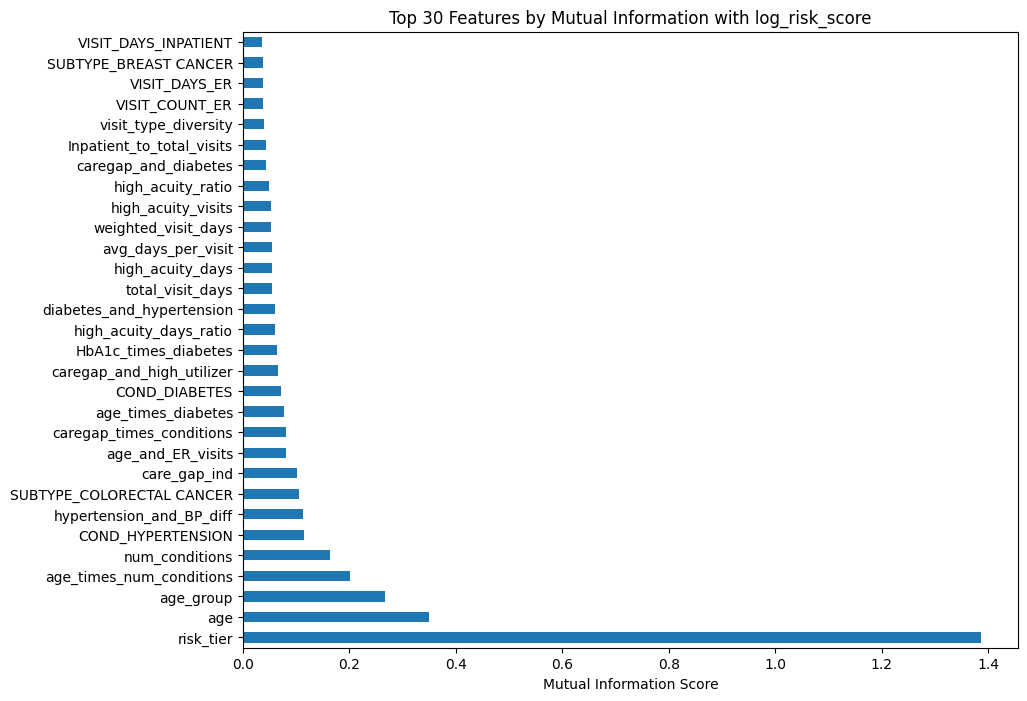

In [76]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


final_df_cleaned = final_df.copy()
# --- Prepare Data ---
# 1. Define your features (X) and target (y)
features_to_exclude = ['patient_id', 'risk_score', 'log_risk_score']
valid_features_to_exclude = [col for col in features_to_exclude if col in final_df_cleaned.columns]
X = final_df_cleaned.drop(columns=valid_features_to_exclude)
y = final_df_cleaned['log_risk_score']

# 2. Identify which features are discrete (for the MI algorithm)
# We'll do this *before* encoding them all to numbers
discrete_features = []
for col in X.columns:
    # Treat object types and low-cardinality numbers as discrete
    if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col]) or X[col].nunique() < 20:
        discrete_features.append(True)
    else:
        discrete_features.append(False)

print(f"Identified {sum(discrete_features)} discrete features.")

# 3. Robustly handle NaNs and Encode all columns to be numeric
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]) and not discrete_features[X.columns.get_loc(col)]:
        # A) For continuous numeric columns: Fill with median (more robust to outliers than 0)
        X[col] = X[col].fillna(X[col].median())
    else:
        # B) For discrete, categorical, or object columns:

        # If it's already a category dtype, add 'Missing' as a valid category
        if pd.api.types.is_categorical_dtype(X[col]):
            if 'Missing' not in X[col].cat.categories:
                X[col] = X[col].cat.add_categories(['Missing'])

        # Fill NaNs (for object or category) with the 'Missing' string
        X[col] = X[col].fillna('Missing')

        # Now, convert the entire column to category codes (numbers)
        X[col] = pd.Categorical(X[col]).codes

# At this point, all columns in X are numeric (int or float) and have no NaNs.

# --- Calculate MI ---
print("Calculating Mutual Information scores...")
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=42)

# --- View Results ---
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

print("\n--- Mutual Information Scores (Feature vs. Target) ---")
print(mi_series)

# Plot the top 30
plt.figure(figsize=(10, 8))
mi_series.head(30).plot(kind='barh')
plt.title('Top 30 Features by Mutual Information with log_risk_score')
plt.xlabel('Mutual Information Score')
plt.show()

In [77]:
# # List of all columns to remove
# features_to_remove = [
#     # 1. Target Leakage & Identifiers
#     'risk_score',
#     'risk_tier',

#     # 2. Redundant Aggregates
#     'total_visits',
#     'total_visit_count',
#     'total_visit_days',
#     'high_acuity_visits',
#     'high_acuity_days',

#     # 3. Redundant Time-Series
#     'visit_count_6m_0',
#     'visit_count_6m_1',
#     'visit_count_6m_2',
#     'visit_count_6m_3',
#     'visit_count_6m_4',
#     'recent_visits',
#     'past_visits',
#     'recent_vs_past_diff',

#     # 4. Redundant Binned/Categorical
#     'age_group',
#     'HbA1c_bin',
#     'high_HbA1c',
#     'BP_bin',
#     'high_BP',

#     # 5. Redundant Engineered Labs
#     'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
#     'LAB_TEST_DIASTOLIC BLOOD PRESSURE',
#     'BP_ratio'
# ]

# # Create the cleaned DataFrame
# # errors='ignore' will prevent an error if a column was already removed
# final_df_cleaned = final_df.drop(columns=features_to_remove, errors='ignore')

# # This is your final list of features for training (X)
# # You still need to separate your target variable (y)
# X_features_list = [col for col in final_df_cleaned.columns if col not in ['log_risk_score']]

# print(f"Original number of columns: {len(final_df.columns)}")
# print(f"Number of columns removed: {len(features_to_remove)}")
# print(f"Remaining columns (features + target): {len(final_df_cleaned.columns)}")
# print("\nFinal list of features to use for X:")
# print(X_features_list)

# # Now you can proceed with your train-test split
# # X = final_df_cleaned[X_features_list]
# # y = final_df_cleaned['log_risk_score']

In [79]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 2.6 MB/s  0:00:37 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 8.9 MB/s  0:00:0111.4 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [catboost]━━ 3/4 [catboost]
Note: you may need to restart the kernel to use updated packages.


Top 30 features by LightGBM importance: ['age', 'avg_visit_gap_days', 'age_and_ER_visits', 'age_times_num_conditions', 'weighted_visit_days', 'total_visit_days', 'age_times_diabetes', 'visit_volatility', 'high_acuity_days', 'visit_trend_slope', 'visit_count_6m_1', 'high_acuity_days_ratio', 'VISIT_DAYS_INPATIENT', 'high_acuity_ratio', 'COND_CANCER', 'avg_days_inpatient', 'avg_days_per_visit', 'visit_count_6m_0', 'SUBTYPE_COLORECTAL CANCER', 'Inpatient_to_total_visits', 'visit_type_diversity', 'ER_to_total_visits', 'long_ER_ratio', 'total_visit_count', 'high_acuity_visits', 'COND_HYPERTENSION', 'care_gap_ind', 'num_conditions', 'zero_visit_periods_count', 'LAB_TEST_HbA1c']


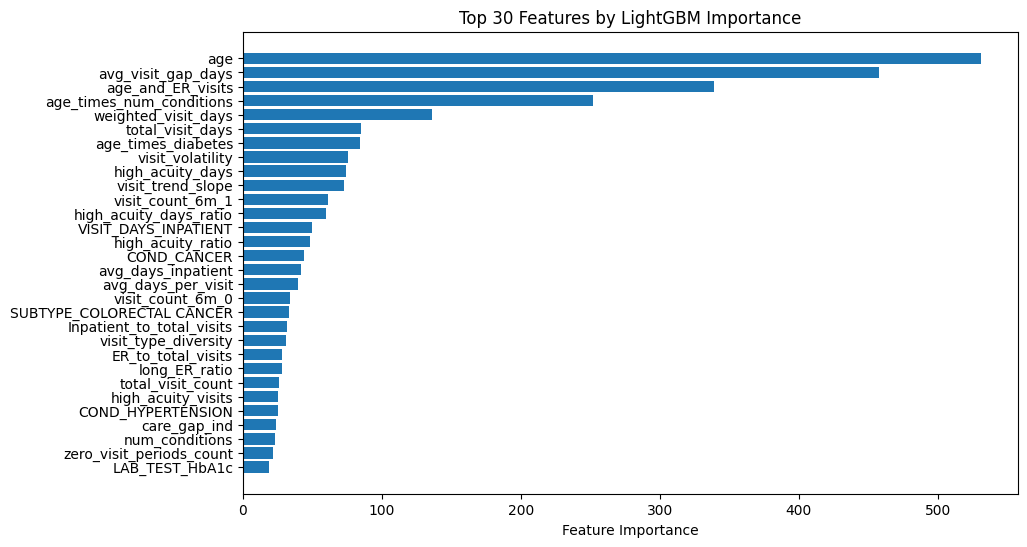

In [81]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select numeric features (excluding target)
X = final_df_cleaned.select_dtypes(include=['int64','float64']).drop(columns=['log_risk_score','patient_id', 'risk_tier','risk_score'])
y = final_df_cleaned['log_risk_score']

# Split into train/test (optional, for importance calculation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)

# Train a simple LightGBM regressor
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

model = lgb.train(params, lgb_train, num_boost_round=100)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importance()
}).sort_values(by='importance', ascending=False)

# Select top k features
k = 30
top_features_lgb = feature_importance.head(k)['feature'].tolist()
print("Top", k, "features by LightGBM importance:", top_features_lgb)

# Optional: Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feature_importance.head(k)['feature'], feature_importance.head(k)['importance'])
plt.xlabel('Feature Importance')
plt.title(f'Top {k} Features by LightGBM Importance')
plt.gca().invert_yaxis()
plt.show()


In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Models
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------
# 1. Prepare data
# -------------------------
X = final_df_cleaned[top_features_lgb]
y = final_df_cleaned['log_risk_score']  # target is log_risk_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 2a. Define models
# -------------------------
models = {
    'LightGBM': lgb.LGBMRegressor(objective='regression', n_estimators=500, learning_rate=0.05, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, verbose=0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42)
}

# -------------------------
# 3. Train, predict and evaluate on original scale
# -------------------------
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict on log scale
    y_pred_log = model.predict(X_test)

    # Convert predictions back to original risk score scale
    y_pred_orig = np.exp(y_pred_log)
    y_test_orig = np.exp(y_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    r2 = r2_score(y_test_orig, y_pred_orig)

    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

    print(f"{name} -> Original Scale RMSE: {rmse:.4f}, R2: {r2:.4f}")

# -------------------------
# 4. Compare all models
# -------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')
print("\nModel Comparison on Original Risk Score Scale:")
print(results_df)


LightGBM -> Original Scale RMSE: 1.5945, R2: 0.4476
XGBoost -> Original Scale RMSE: 1.5463, R2: 0.4805
CatBoost -> Original Scale RMSE: 1.4897, R2: 0.5178
RandomForest -> Original Scale RMSE: 1.5952, R2: 0.4471

Model Comparison on Original Risk Score Scale:
          Model      RMSE        R2
2      CatBoost  1.489722  0.517822
1       XGBoost  1.546348  0.480468
0      LightGBM  1.594535  0.447585
3  RandomForest  1.595182  0.447137


In [83]:
# --- Feature correlation matrix (numeric features only; excludes target) ---

import numpy as np
import pandas as pd

TARGET_COL = "risk_score"      # change if your target name differs
CORR_METHOD = "pearson"        # or "spearman"

# Copy and prep
df = final_df_cleaned.copy()

# Exclude target
X = df.drop(columns=[c for c in df.columns if c == TARGET_COL], errors="ignore")

# Treat booleans as ints and keep numeric columns
for c in X.columns:
    if X[c].dtype == bool:
        X[c] = X[c].astype(int)
work_num = X.select_dtypes(include=[np.number]).copy()

# Correlation matrix
corr = work_num.corr(method=CORR_METHOD)

# (Optional) upper triangle mask to avoid duplicates when listing pairs
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Preview
corr.head()  # or: display(corr)

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,recent_visits,past_visits,recent_vs_past_diff,visit_volatility,zero_visit_periods_count,high_acuity_visits,high_acuity_ratio,high_acuity_days,high_acuity_days_ratio,urgent_care_ratio
patient_id,1.000000,0.012352,0.001029,-0.005448,0.007842,-0.001217,-0.016519,0.000785,-0.022048,-0.007473,...,-0.010256,-0.008604,0.007204,-0.010391,0.010090,-0.002823,0.002031,0.002804,0.001064,-0.006311
LAB_TEST_HbA1c,0.012352,1.000000,-0.000522,-0.000404,-0.138362,-0.000516,-0.081367,-0.000421,-0.000596,0.130567,...,-0.001920,-0.013308,0.013106,-0.011518,0.016923,-0.006664,-0.003905,0.002880,-0.004069,-0.014165
LAB_TEST_SYSTOLIC BLOOD PRESSURE,0.001029,-0.000522,1.000000,-0.198415,-0.002216,-0.000380,-0.003642,-0.000310,-0.000438,0.096025,...,-0.001412,0.023899,-0.024219,0.015465,-0.015104,0.009364,-0.005245,0.005475,-0.003912,0.010631
LAB_TEST_DIASTOLIC BLOOD PRESSURE,-0.005448,-0.000404,-0.198415,1.000000,-0.001713,-0.000293,-0.002815,-0.000240,-0.000339,0.074228,...,-0.001092,-0.004465,0.004334,-0.004205,0.003186,-0.006118,-0.007629,-0.003465,-0.007676,0.005967
SUBTYPE_BREAST CANCER,0.007842,-0.138362,-0.002216,-0.001713,1.000000,0.113461,0.539980,-0.001788,0.047552,0.553962,...,0.004760,0.136255,-0.136279,0.124505,-0.102808,0.170568,0.099248,0.193997,0.104397,-0.001645


In [84]:
# --- List highly correlated pairs above a threshold ---

HIGH_CORR_THRESH = 0.8  # adjust as needed

# If 'upper' not defined from the previous block, compute it:
if "upper" not in globals():
    upper = work_num.corr(method=CORR_METHOD).where(
        np.triu(np.ones(work_num.shape[1]), k=1).astype(bool)
    )

high_pairs = (
    upper.stack()
         .rename("corr")
         .rename_axis(["feat1", "feat2"])
         .reset_index()
)
high_pairs["abs_corr"] = high_pairs["corr"].abs()
high_pairs = high_pairs.query("abs_corr >= @HIGH_CORR_THRESH") \
                       .sort_values("abs_corr", ascending=False) \
                       .reset_index(drop=True)

# Preview top pairs
high_pairs.head(30)  # or: display(high_pairs)


,feat1,feat2,corr,abs_corr
0,high_BP,hypertension_and_high_BP,1.000000,1.000000
1,total_visit_count,total_visits,1.000000,1.000000
2,high_HbA1c,caregap_and_high_HbA1c,1.000000,1.000000
3,COND_HYPERTENSION,hypertension_and_BP_diff,0.999628,0.999628
4,VISIT_COUNT_URGENT CARE,VISIT_DAYS_URGENT CARE,0.999603,0.999603
5,high_acuity_ratio,high_acuity_days_ratio,0.997413,0.997413
6,COND_DIABETES,HbA1c_times_diabetes,0.996741,0.996741
7,BP_ratio,BP_diff,0.995681,0.995681
8,visit_count_6m_3,recent_visits,0.990743,0.990743
9,VISIT_COUNT_ER,VISIT_DAYS_ER,0.990662,0.990662


In [85]:
# --- Drop a redundant feature from each high-corr pair
#     Keep the more predictive wrt target; else fewer NaNs; else higher variance ---

# y for predictiveness comparison; if missing, set y=None
y = df[TARGET_COL] if TARGET_COL in df.columns else None

def _choose_drop_feature(feat1, feat2, Xnum, yvec):
    s1, s2 = Xnum[feat1], Xnum[feat2]

    # (a) target predictiveness (absolute Pearson corr with target)
    if yvec is not None:
        yt = pd.to_numeric(yvec, errors="coerce")
        c1 = abs(pd.concat([s1, yt], axis=1).corr(method="pearson").iloc[0, 1])
        c2 = abs(pd.concat([s2, yt], axis=1).corr(method="pearson").iloc[0, 1])
        c1 = -1 if pd.isna(c1) else c1
        c2 = -1 if pd.isna(c2) else c2
        if c1 != c2:
            return feat2 if c1 > c2 else feat1  # drop the less predictive

    # (b) fewer NaNs
    n1, n2 = s1.isna().sum(), s2.isna().sum()
    if n1 != n2:
        return feat1 if n1 > n2 else feat2  # drop the one with MORE NaNs

    # (c) higher variance (keep higher variance; drop lower)
    v1, v2 = s1.var(skipna=True), s2.var(skipna=True)
    if not pd.isna(v1) and not pd.isna(v2) and v1 != v2:
        return feat2 if v1 > v2 else feat1

    # (d) tie-breaker: drop lexicographically later
    return max(feat1, feat2)

to_drop = []
seen_pairs = set()

for _, row in high_pairs.iterrows():
    f1, f2 = row["feat1"], row["feat2"]
    if f1 in to_drop or f2 in to_drop:
        continue
    key = tuple(sorted((f1, f2)))
    if key in seen_pairs:
        continue
    seen_pairs.add(key)
    drop_feat = _choose_drop_feature(f1, f2, work_num, y)
    to_drop.append(drop_feat)

# De-correlated feature set
X_decorrelated = work_num.drop(columns=to_drop, errors="ignore").copy()

# If you need target back:
final_for_model = (
    pd.concat([X_decorrelated, y], axis=1)
    if y is not None else X_decorrelated
)

# Quick summary
print("Dropped features due to high inter-feature correlation:", len(to_drop))
print(sorted(to_drop)[:50])
print("Original numeric features:", work_num.shape[1])
print("After dropping:", X_decorrelated.shape[1])


Dropped features due to high inter-feature correlation: 41
['BP_category', 'BP_ratio', 'COND_DIABETES', 'COND_HYPERTENSION', 'ER_to_total_visits', 'HbA1c_category', 'HbA1c_times_diabetes', 'LAB_TEST_DIASTOLIC BLOOD PRESSURE', 'MAP', 'VISIT_COUNT_ER', 'VISIT_COUNT_INPATIENT', 'VISIT_DAYS_ER', 'VISIT_DAYS_INPATIENT', 'VISIT_DAYS_URGENT CARE', 'age_and_ER_visits', 'age_times_diabetes', 'avg_days_ER', 'avg_days_inpatient', 'care_gap_ind', 'caregap_and_diabetes', 'high_BP', 'high_HbA1c', 'high_acuity_ratio', 'high_utilizer', 'hypertension_and_BP_diff', 'hypertension_and_high_BP', 'num_conditions', 'past_visits', 'recent_visits', 'recent_vs_past_diff', 'risk_tier', 'total_visit_days', 'total_visits', 'triple_threat', 'urgent_care_ratio', 'visit_count_6m_0', 'visit_trend_slope', 'visit_type_diversity', 'visit_volatility', 'weighted_visit_days', 'zero_visit_periods_count']
Original numeric features: 74
After dropping: 33


In [88]:
X_decorrelated.columns

Index(['patient_id', 'LAB_TEST_HbA1c', 'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
       'SUBTYPE_BREAST CANCER', 'SUBTYPE_CHOLESTEROL',
       'SUBTYPE_COLORECTAL CANCER', 'SUBTYPE_DIABETES', 'SUBTYPE_HYPERTENSION',
       'COND_CANCER', 'age', 'VISIT_COUNT_URGENT CARE', 'log_risk_score',
       'visit_count_6m_1', 'visit_count_6m_2', 'visit_count_6m_3',
       'visit_count_6m_4', 'total_visit_count', 'avg_visit_gap_days',
       'avg_days_per_visit', 'Inpatient_to_total_visits', 'avg_days_urgent',
       'age_times_num_conditions', 'BP_diff', 'long_ER_ratio',
       'caregap_times_conditions', 'diabetes_and_hypertension',
       'diabetes_and_cancer', 'cancer_and_hypertension',
       'caregap_and_high_HbA1c', 'caregap_and_high_utilizer',
       'high_acuity_visits', 'high_acuity_days', 'high_acuity_days_ratio'],
      dtype='object')

In [89]:
X_decorrelated=X_decorrelated.drop(columns='log_risk_score')

In [90]:
from sklearn.impute import SimpleImputer
X = X_decorrelated.copy()
y = final_df_cleaned.loc[X.index, 'log_risk_score'].copy()

print(f"X shape: {X.shape} | y length: {len(y)}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Handle NaNs for sklearn RF (and to keep things consistent across models)
imp = SimpleImputer(strategy="median")
X_train_i = imp.fit_transform(X_train)
X_test_i  = imp.transform(X_test)

# -------------------------
# 2) Define models
# -------------------------
models = {
    'LightGBM': lgb.LGBMRegressor(objective='regression', n_estimators=500, learning_rate=0.05, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05,
                                max_depth=6, subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, loss_function='RMSE', verbose=0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
}

# -------------------------
# 3) Train, predict, evaluate on ORIGINAL scale
# -------------------------
results = []

for name, model in models.items():
    # Train on imputed matrices (CatBoost/LightGBM/XGB handle NaNs, but we keep it uniform)
    model.fit(X_train_i, y_train)

    # Predict on log scale
    y_pred_log = model.predict(X_test_i)

    # Convert back to original risk score scale
    # If you used log1p for target, replace exp with expm1 for both y_pred and y_test.
    y_pred_orig = np.exp(y_pred_log)
    y_test_orig = np.exp(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    r2 = r2_score(y_test_orig, y_pred_orig)

    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})
    print(f"{name} -> Original Scale RMSE: {rmse:.4f}, R2: {r2:.4f}")

# -------------------------
# 4) Compare all models
# -------------------------
results_df = pd.DataFrame(results).sort_values(by='RMSE', ascending=True).reset_index(drop=True)
print("\nModel Comparison on Original Risk Score Scale:")
print(results_df.to_string(index=False))


X shape: (8000, 32) | y length: 8000


/home/nikhil/hilabs/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM -> Original Scale RMSE: 1.5690, R2: 0.4651
XGBoost -> Original Scale RMSE: 1.5776, R2: 0.4593
CatBoost -> Original Scale RMSE: 1.4887, R2: 0.5185
RandomForest -> Original Scale RMSE: 1.6226, R2: 0.4279

Model Comparison on Original Risk Score Scale:
       Model     RMSE       R2
    CatBoost 1.488749 0.518451
    LightGBM 1.569047 0.465104
     XGBoost 1.577556 0.459287
RandomForest 1.622639 0.427940


In [104]:
%pip install sentence-transformers

# ==== 0) Imports & setup ====
import re
import numpy as np
import pandas as pd

# Embeddings
from sentence_transformers import SentenceTransformer

# Clustering
try:
    import hdbscan
    HAVE_HDBSCAN = True
except Exception:
    HAVE_HDBSCAN = False
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# -----------------------------------------------------------
# 1) Normalize diagnosis strings (simple, robust text cleanup)
# -----------------------------------------------------------
def normalize_dx(s: str) -> str:
    if pd.isna(s):
        return ""
    s = s.lower().strip()
    # remove quotes/commas/brackets etc.
    s = re.sub(r"[\[\]\(\),;:\"'\/\\]+", " ", s)
    # remove common filler words
    s = re.sub(r"\b(unspecified|other|initial encounter|without|with|and|type|region)\b", " ", s)
    # drop laterality and basic stopwords that cause fragmentation
    s = re.sub(r"\b(left|right|bilateral|acute|chronic|primary|secondary)\b", " ", s)
    # de-pluralize simple plurals (naive)
    s = re.sub(r"\b(\w+?)s\b", r"\1", s)
    # collapse spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

visit_df = visit_df.copy()
visit_df["dx_norm"] = visit_df["prncpl_diag_nm"].astype(str).map(normalize_dx)

# Keep a deduped vocabulary
dx_vocab = (
    visit_df.loc[visit_df["dx_norm"].str.len() > 0, "dx_norm"]
    .drop_duplicates()
    .reset_index(drop=True)
)
print(f"Unique normalized diagnoses: {len(dx_vocab)}")

# -----------------------------------------
# 2) Embed the diagnosis vocabulary (SentBERT)
# -----------------------------------------
# Small, fast, surprisingly strong baseline model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
emb = model.encode(
    dx_vocab.tolist(),
    batch_size=256,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True,  # cosine-ready
)
print("Embeddings shape:", emb.shape)

# ---------------------------------------------------
# 3) Cluster similar strings → cluster ids per term
#    Prefer HDBSCAN; fallback to Agglomerative
# ---------------------------------------------------
if HAVE_HDBSCAN:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=5,         # tune per dataset size
        min_samples=2,              # more/less conservative
        metric="euclidean",         # embeddings are normalized → euclidean ~ cosine
        cluster_selection_epsilon=0.05,
        cluster_selection_method="eom",
        prediction_data=False
    )
    labels = clusterer.fit_predict(emb)
else:
    # Agglomerative fallback with cosine distance threshold
    # Choose a threshold; smaller → more clusters, larger → fewer clusters
    D = pairwise_distances(emb, metric="cosine")
    # We set distance_threshold; n_clusters must be None for this mode
    clusterer = AgglomerativeClustering(
        n_clusters=None,
        affinity="precomputed",
        linkage="average",
        distance_threshold=0.1  # tune; ~cosine similarity 0.80
    )
    labels = clusterer.fit_predict(D)

# labels: -1 means "noise" in HDBSCAN; in Agglo everything gets a cluster
labels = pd.Series(labels, index=dx_vocab.index, name="dx_cluster")

# Map vocab → cluster
dx_map = pd.DataFrame({"dx_norm": dx_vocab, "dx_cluster": labels.values})

# Optional: pick a human-readable representative for each cluster
# (the most frequent original string in that cluster)
tmp = (
    visit_df.merge(dx_map, on="dx_norm", how="left")
            .groupby(["dx_cluster", "dx_norm"])
            .size()
            .rename("count")
            .reset_index()
)
rep = tmp.sort_values(["dx_cluster", "count"], ascending=[True, False]) \
         .drop_duplicates("dx_cluster") \
         .rename(columns={"dx_norm": "dx_representative"})[["dx_cluster", "dx_representative"]]

dx_map = dx_map.merge(rep, on="dx_cluster", how="left")

# Persist mapping if you want to inspect/edit:
# dx_map.to_csv("diagnosis_cluster_mapping.csv", index=False)

# ------------------------------------------------------
# 4) Attach clusters to visits and make per-patient features
# ------------------------------------------------------
vis = visit_df.merge(dx_map[["dx_norm", "dx_cluster"]], on="dx_norm", how="left")

# Put HDBSCAN noise into its own bucket (optional)
vis["dx_cluster"] = vis["dx_cluster"].fillna(-1).astype(int)

# Count visits per (patient, cluster)
dx_feat = (
    vis.groupby(["patient_id", "dx_cluster"])
       .size()
       .unstack(fill_value=0)
       .add_prefix("DXC_")
       .reset_index()
)

print("Diagnosis feature matrix shape (wide):", dx_feat.shape)

# ------------------------------------------------------
# 5) Join with your modeling feature matrix (X_decorrelated)
# ------------------------------------------------------
# Ensure patient_id is the index in both (or merge on column)
if "patient_id" not in X_decorrelated.index.names and "patient_id" in X_decorrelated.columns:
    X_base = X_decorrelated.set_index("patient_id")
else:
    X_base = X_decorrelated.copy()
    if "patient_id" not in X_base.index.names:
        raise ValueError("Please index X_decorrelated by patient_id or include a 'patient_id' column.")

dx_feat = dx_feat.set_index("patient_id")

# Align and fill missing
X_with_dx = X_base.join(dx_feat, how="left").fillna(0)

print("Original X_decorrelated:", X_base.shape)
print("X_with_dx:", X_with_dx.shape)

# If you keep only top-K clusters to control width:
K = 50  # tune
cluster_totals = dx_feat.sum(0).sort_values(ascending=False)
topk_cols = cluster_totals.index[:K]
X_with_dx_topk = X_base.join(dx_feat[topk_cols], how="left").fillna(0)
print("X_with_dx_topk:", X_with_dx_topk.shape)

# Optionally, keep both:
#   - X_with_dx (all clusters)
#   - X_with_dx_topk (top-K only)


  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 2.7 MB/s  0:00:04a 0:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 3.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 3.1 MB/s  0:00:01m 3.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 3.8 MB/s  0:00:003.7 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 5.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 3.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 16.4 MB/s  0:01:05 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 10.6 MB/s  0:00:43 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 6.4 MB/s  0:00:01 6.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 8.1 

Batches: 100%|██████████| 5/5 [00:00<00:00, 16.18it/s]

Embeddings shape: (1233, 384)


TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [95]:
import re

def normalize_dx(s: str) -> str:
    if pd.isna(s):
        return ""
    s = s.lower().strip()
    # remove quotes/commas/brackets etc.
    s = re.sub(r"[\[\]\(\),;:\"'\/\\]+", " ", s)
    # remove common filler words
    s = re.sub(r"\b(unspecified|other|initial encounter|without|with|and|type|region)\b", " ", s)
    # drop laterality and basic stopwords that cause fragmentation
    s = re.sub(r"\b(left|right|bilateral|acute|chronic|primary|secondary)\b", " ", s)
    # de-pluralize simple plurals (naive)
    s = re.sub(r"\b(\w+?)s\b", r"\1", s)
    # collapse spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

visit_df = visit_df.copy()
visit_df["dx_norm"] = visit_df["prncpl_diag_nm"].astype(str).map(normalize_dx)

# Keep a deduped vocabulary
dx_vocab = (
    visit_df.loc[visit_df["dx_norm"].str.len() > 0, "dx_norm"]
    .drop_duplicates()
    .reset_index(drop=True)
)
print(f"Unique normalized diagnoses: {len(dx_vocab)}")


Unique normalized diagnoses: 1233


In [308]:
# # -------------------------
# # 1) Choose feature matrix
# # -------------------------
# if "X_with_dx_topk" in globals():
#     X = X_with_dx_topk.copy()
#     src = "X_with_dx_topk"
# elif "X_with_dx" in globals():
#     X = X_with_dx.copy()
#     src = "X_with_dx"
# else:
#     X = X_decorrelated.copy()
#     src = "X_decorrelated"

# # Ensure we can align by patient_id
# def ensure_index_by_patient_id(df):
#     if isinstance(df, pd.DataFrame):
#         if "patient_id" in df.index.names:
#             return df
#         if "patient_id" in df.columns:
#             return df.set_index("patient_id")
#     return df  # assume already indexed appropriately

# X = ensure_index_by_patient_id(X)
# ffc = final_df_cleaned.copy()
# ffc = ensure_index_by_patient_id(ffc)

# # Build y and align X,y on their common patient_ids
# y_all = ffc["log_risk_score"]
# common_idx = X.index.intersection(y_all.index)

# X = X.loc[common_idx].sort_index()
# y = y_all.loc[common_idx].sort_index()

# # Optional: drop rows with missing y
# mask = y.notna()
# X = X.loc[mask]
# y = y.loc[mask]

# print(f"Using features from: {src}")
# print(f"Aligned rows: {len(common_idx)} | After dropping NaN y: {mask.sum()}")
# print(f"X shape: {X.shape} | y length: {len(y)}")

# # -------------------------
# # 2) Train/test split & impute
# # -------------------------
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.20, random_state=42
# )

# imp = SimpleImputer(strategy="median")
# X_train_i = imp.fit_transform(X_train)
# X_test_i  = imp.transform(X_test)

# # -------------------------
# # 3) Define models
# # -------------------------
# models = {
#     'LightGBM': lgb.LGBMRegressor(objective='regression', n_estimators=500, learning_rate=0.05, random_state=42),
#     'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05,
#                                 max_depth=6, subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1),
#     'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, loss_function='RMSE', verbose=0, random_state=42),
#     'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
# }

# # -------------------------
# # 4) Train, predict, evaluate on ORIGINAL scale
# # -------------------------
# results = []

# for name, model in models.items():
#     model.fit(X_train_i, y_train)
#     y_pred_log = model.predict(X_test_i)

#     # If target used log1p, replace exp with expm1 for both lines below
#     y_pred_orig = np.exp(y_pred_log)
#     y_test_orig = np.exp(y_test)

#     rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
#     r2 = r2_score(y_test_orig, y_pred_orig)

#     results.append({'Model': name, 'RMSE': rmse, 'R2': r2})
#     print(f"{name} -> Original Scale RMSE: {rmse:.4f}, R2: {r2:.4f}")

# # -------------------------
# # 5) Compare all models
# # -------------------------
# results_df = pd.DataFrame(results).sort_values(by='RMSE', ascending=True).reset_index(drop=True)
# print("\nModel Comparison on Original Risk Score Scale:")
# print(results_df.to_string(index=False))

In [91]:
%pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 2.1 MB/s  0:00:13a 0:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gensim]━━━━━━━━━━━ 2/3 [gensim]
Note: you may need to restart the kernel to use updated packages.


In [96]:
# --- Replace Step 2 (SentenceTransformer) with GloVe/word2vec embeddings via gensim ---

import re
import numpy as np
import pandas as pd
from collections import Counter
from gensim.utils import simple_preprocess
import gensim.downloader as api
from sklearn.preprocessing import normalize

# 1) Load a pre-trained word embedding model (pick ONE)
# Small & easy:
wv = api.load("glove-wiki-gigaword-100")        # 100-dim GloVe
# Alternative (bigger, slower, but strong):
# wv = api.load("word2vec-google-news-300")     # 300-dim word2vec (1.6GB)

dim = wv.vector_size

# 2) Tokenize normalized diagnoses (dx_vocab is from your previous step)
docs = [simple_preprocess(s, deacc=True, min_len=2) for s in dx_vocab.tolist()]

# 3) Build simple IDF from this corpus (for weighting)
N = len(docs)
df_counts = Counter()
for tokens in set(map(tuple, docs)):  # unique doc rows (optional)
    pass
# More precise DF: count once per document for each token
df_counts = Counter()
for tokens in docs:
    for t in set(tokens):
        df_counts[t] += 1

idf = {t: np.log((N + 1) / (df + 1)) + 1.0 for t, df in df_counts.items()}

# 4) Make IDF-weighted average embedding for each diagnosis
def sent_embed(tokens):
    vecs = []
    weights = []
    for t in tokens:
        if t in wv.key_to_index:         # known word
            vecs.append(wv.get_vector(t))
            weights.append(idf.get(t, 1.0))
    if not vecs:                         # all OOV → zero vector
        return np.zeros(dim, dtype=np.float32)
    V = np.vstack(vecs)
    w = np.asarray(weights, dtype=np.float32)[:, None]  # (k,1)
    return (V * w).sum(axis=0) / (w.sum() + 1e-9)

emb = np.vstack([sent_embed(tokens) for tokens in docs]).astype(np.float32)

# 5) L2-normalize (so cosine distance ≈ euclidean on the unit sphere)
emb = normalize(emb, norm="l2", axis=1)

print("Embeddings shape (GloVe/word2vec):", emb.shape)

# 6) Proceed with your existing clustering block unchanged
# (HDBSCAN with metric='euclidean' OR Agglomerative on cosine distances)
# Example (Agglomerative):
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

D = pairwise_distances(emb, metric="cosine")
clusterer = AgglomerativeClustering(
    n_clusters=None,
    metric="precomputed",   # use 'metric' (affinity is deprecated)
    linkage="average",
    distance_threshold=0.20  # tune: lower -> more clusters, higher -> fewer clusters
)
labels = clusterer.fit_predict(D)

Embeddings shape (GloVe/word2vec): (1233, 100)


In [97]:
# === Build X_with_dx and X_with_dx_topk from clustering labels ===
# Assumes you already have:
# - dx_vocab (list/Series of unique normalized diagnosis strings)
# - labels  (np.array of cluster ids aligned with dx_vocab)
# - visit_df with columns: patient_id, prncpl_diag_nm  (and optionally dx_norm)
# - X_decorrelated (patient-level features; has 'patient_id' as a column or index)

import re
import numpy as np
import pandas as pd

# 1) Ensure normalized text exists on visit_df (reuse your earlier normalize_dx if available)
try:
    normalize_dx
except NameError:
    def normalize_dx(s: str) -> str:
        if pd.isna(s): return ""
        s = s.lower().strip()
        s = re.sub(r"[\[\]\(\),;:\"'\/\\]+", " ", s)
        s = re.sub(r"\b(unspecified|other|initial encounter|without|with|and|type|region)\b", " ", s)
        s = re.sub(r"\b(left|right|bilateral|acute|chronic|primary|secondary)\b", " ", s)
        s = re.sub(r"\b(\w+?)s\b", r"\1", s)
        s = re.sub(r"\s+", " ", s).strip()
        return s

visit_df = visit_df.copy()
if "dx_norm" not in visit_df.columns:
    visit_df["dx_norm"] = visit_df["prncpl_diag_nm"].astype(str).map(normalize_dx)

# 2) Map vocab -> cluster id
dx_map = pd.DataFrame({
    "dx_norm": pd.Series(dx_vocab),
    "dx_cluster": pd.Series(labels).astype(int)
})

# (Optional) choose a human-readable representative per cluster
tmp = (
    visit_df.merge(dx_map, on="dx_norm", how="left")
            .groupby(["dx_cluster", "dx_norm"])
            .size()
            .rename("count")
            .reset_index()
)
rep = (tmp.sort_values(["dx_cluster","count"], ascending=[True, False])
          .drop_duplicates("dx_cluster")
          .rename(columns={"dx_norm":"dx_representative"})[["dx_cluster","dx_representative"]])
dx_map = dx_map.merge(rep, on="dx_cluster", how="left")

# 3) Attach clusters to visits
vis = visit_df.merge(dx_map[["dx_norm","dx_cluster"]], on="dx_norm", how="left")
# If your clustering produced noise labels (e.g., HDBSCAN -1), keep them or fill with -1
vis["dx_cluster"] = vis["dx_cluster"].fillna(-1).astype(int)

# 4) Pivot to per-patient cluster counts
dx_feat = (
    vis.groupby(["patient_id","dx_cluster"])
       .size()
       .unstack(fill_value=0)
       .add_prefix("DXC_")
       .reset_index()
)

# 5) Join with your base matrix X_decorrelated
if "patient_id" in getattr(X_decorrelated, "columns", []):
    X_base = X_decorrelated.set_index("patient_id").copy()
else:
    X_base = X_decorrelated.copy()
    if "patient_id" not in (X_base.index.names or []):
        raise ValueError("X_decorrelated must have 'patient_id' as a column or index.")

dx_feat = dx_feat.set_index("patient_id")
X_with_dx = X_base.join(dx_feat, how="left").fillna(0)

print("Original X_decorrelated:", X_base.shape)
print("X_with_dx:", X_with_dx.shape)

# 6) Build top-K cluster feature matrix (to control width)
K = 50  # tune this
cluster_totals = dx_feat.sum(axis=0).sort_values(ascending=False)
topk_cols = cluster_totals.index[:K]
X_with_dx_topk = X_base.join(dx_feat[topk_cols], how="left").fillna(0)

print("Top-K cluster columns:", (topk_cols))
print("X_with_dx_topk:", X_with_dx_topk.shape)


Original X_decorrelated: (8000, 31)
X_with_dx: (8000, 573)
Top-K cluster columns: Index(['DXC_38', 'DXC_36', 'DXC_13', 'DXC_307', 'DXC_79', 'DXC_275', 'DXC_85',
       'DXC_12', 'DXC_535', 'DXC_3', 'DXC_195', 'DXC_40', 'DXC_28', 'DXC_14',
       'DXC_21', 'DXC_92', 'DXC_124', 'DXC_423', 'DXC_6', 'DXC_76', 'DXC_30',
       'DXC_455', 'DXC_102', 'DXC_105', 'DXC_511', 'DXC_517', 'DXC_89',
       'DXC_271', 'DXC_235', 'DXC_48', 'DXC_299', 'DXC_94', 'DXC_503',
       'DXC_61', 'DXC_273', 'DXC_253', 'DXC_7', 'DXC_59', 'DXC_495', 'DXC_20',
       'DXC_401', 'DXC_492', 'DXC_374', 'DXC_197', 'DXC_18', 'DXC_122',
       'DXC_292', 'DXC_361', 'DXC_53', 'DXC_298'],
      dtype='object', name='dx_cluster')
X_with_dx_topk: (8000, 81)


In [98]:
# =========================
# Train & evaluate models after adding DX cluster features (robust alignment)
# =========================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Models
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------
# 1) Choose feature matrix
# -------------------------
if "X_with_dx_topk" in globals():
    X = X_with_dx_topk.copy()
    src = "X_with_dx_topk"
elif "X_with_dx" in globals():
    X = X_with_dx.copy()
    src = "X_with_dx"
else:
    X = X_decorrelated.copy()
    src = "X_decorrelated"

# Ensure we can align by patient_id
def ensure_index_by_patient_id(df):
    if isinstance(df, pd.DataFrame):
        if "patient_id" in (df.index.names or []):
            return df
        if "patient_id" in df.columns:
            return df.set_index("patient_id")
    return df  # assume already indexed appropriately

X = ensure_index_by_patient_id(X)
ffc = ensure_index_by_patient_id(final_df_cleaned.copy())

# Build y and align X,y on their common patient_ids
y_all = ffc["log_risk_score"]
common_idx = X.index.intersection(y_all.index)

X = X.loc[common_idx].sort_index()
y = y_all.loc[common_idx].sort_index()

# Optional: drop rows with missing y
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

print(f"Using features from: {src}")
print(f"Aligned rows: {len(common_idx)} | After dropping NaN y: {mask.sum()}")
print(f"X shape: {X.shape} | y length: {len(y)}")

# -------------------------
# 2) Train/test split & impute
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

imp = SimpleImputer(strategy="median")
X_train_i = imp.fit_transform(X_train)
X_test_i  = imp.transform(X_test)

# -------------------------
# 3) Define models
# -------------------------
models = {
    'LightGBM': lgb.LGBMRegressor(objective='regression', n_estimators=500, learning_rate=0.05, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05,
                                max_depth=6, subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, loss_function='RMSE', verbose=0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
}

# -------------------------
# 4) Train, predict, evaluate on ORIGINAL scale
# -------------------------
results = []

for name, model in models.items():
    model.fit(X_train_i, y_train)
    y_pred_log = model.predict(X_test_i)

    # If target used log1p, replace exp with expm1 for both lines below
    y_pred_orig = np.exp(y_pred_log)
    y_test_orig = np.exp(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    r2 = r2_score(y_test_orig, y_pred_orig)

    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})
    print(f"{name} -> Original Scale RMSE: {rmse:.4f}, R2: {r2:.4f}")

# -------------------------
# 5) Compare all models
# -------------------------
results_df = pd.DataFrame(results).sort_values(by='RMSE', ascending=True).reset_index(drop=True)
print("\nModel Comparison on Original Risk Score Scale:")
print(results_df.to_string(index=False))


Using features from: X_with_dx_topk
Aligned rows: 8000 | After dropping NaN y: 8000
X shape: (8000, 81) | y length: 8000


/home/nikhil/hilabs/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM -> Original Scale RMSE: 1.5769, R2: 0.4598
XGBoost -> Original Scale RMSE: 1.5781, R2: 0.4589
CatBoost -> Original Scale RMSE: 1.5216, R2: 0.4970
RandomForest -> Original Scale RMSE: 1.5741, R2: 0.4617

Model Comparison on Original Risk Score Scale:
       Model     RMSE       R2
    CatBoost 1.521618 0.496953
RandomForest 1.574104 0.461651
    LightGBM 1.576874 0.459754
     XGBoost 1.578146 0.458883


In [101]:
# ==============================
# SHAP analysis on trained model
# Drop 10 least important features
# ==============================
%pip install shap
import numpy as np
import pandas as pd
import shap

# --- 0) Choose which trained model to explain ---
# Use one of: 'LightGBM', 'XGBoost', 'CatBoost', 'RandomForest'
MODEL_NAME = 'LightGBM'

# Refit the chosen model on the imputed training data (keeps things explicit/reproducible)
model = models[MODEL_NAME]
model.fit(X_train_i, y_train)

# --- 1) Build DataFrames after imputation so SHAP has feature names ---
X_train_i_df = pd.DataFrame(X_train_i, columns=X.columns, index=X_train.index)
X_test_i_df  = pd.DataFrame(X_test_i,  columns=X.columns, index=X_test.index)

# --- 2) Compute SHAP values ---
# TreeExplainer works for tree-based models (LGBM/XGB/CatBoost/RF)
explainer = shap.TreeExplainer(model)
# For regression, shap_values is (n_samples, n_features)
shap_values = explainer.shap_values(X_test_i_df)

# Ensure we have the right shape if library returns list (older CatBoost/XGB versions)
if isinstance(shap_values, list):
    # pick the single output for regression
    shap_values = shap_values[0]

# --- 3) Mean |SHAP| per feature (global importance) ---
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance = pd.Series(mean_abs_shap, index=X_test_i_df.columns).sort_values(ascending=False)

print("\nTop 15 features by mean |SHAP|:")
print(shap_importance.head(15).to_string())

print("\nBottom 15 features by mean |SHAP|:")
print(shap_importance.tail(15).to_string())

# --- 4) Pick the 10 least important features & drop them from the full X ---
bottom_10 = shap_importance.tail(10).index.tolist()
print("\nWill drop these 10 lowest-importance features:")
print(bottom_10)

X_shap_reduced = X.drop(columns=bottom_10, errors="ignore").copy()
print(f"\nOriginal feature count: {X.shape[1]} -> After drop: {X_shap_reduced.shape[1]}")

# If you want to continue training with reduced features:
# Re-split using the same indices to keep comparability
X_train_r = X_shap_reduced.loc[X_train.index]
X_test_r  = X_shap_reduced.loc[X_test.index]

# Re-impute (since columns changed)
from sklearn.impute import SimpleImputer
imp_r = SimpleImputer(strategy="median")
X_train_r_i = imp_r.fit_transform(X_train_r)
X_test_r_i  = imp_r.transform(X_test_r)

# (Optional) quick re-eval with the same model
model_r = models[MODEL_NAME]
model_r.fit(X_train_r_i, y_train)
y_pred_log_r = model_r.predict(X_test_r_i)

# If target was log1p, replace exp by expm1
y_pred_orig_r = np.exp(y_pred_log_r)
y_test_orig   = np.exp(y_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse_r = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig_r))
r2_r   = r2_score(y_test_orig, y_pred_orig_r)
print(f"\n[{MODEL_NAME} after dropping 10 features] -> RMSE: {rmse_r:.4f}, R2: {r2_r:.4f}")

# --- (Optional) SHAP plots ---
shap.summary_plot(shap_values, X_test_i_df, plot_type="bar", max_display=30)
shap.summary_plot(shap_values, X_test_i_df, max_display=30)


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.0 MB/s  0:00:00m 5.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 12.4 MB/s  0:00:002.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s  0:00:04 eta 0:00:010:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [shap]━━━━━━ 5/6 [shap] [numba]
Note: you may need to restart the kernel to use updated packages.


/home/nikhil/hilabs/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: Shape of passed values is (6400, 58), indices imply (6400, 81)

In [99]:
# ============================================================
# WOE/IV-based feature selection + correlation pruning + train
# ============================================================
# Uses:
#   - X_with_dx_topk (preferred) or X_with_dx or X_decorrelated
#   - final_df_cleaned['log_risk_score'] (regression target)
# Steps:
#   1) Align X with y; derive binary label for WOE/IV from original risk score (median split)
#   2) Compute IV for each feature (numeric & categorical)
#   3) Drop N lowest-IV features
#   4) Prune redundant features via high inter-feature correlation (|r| >= THRESH), keeping higher-IV one
#   5) Train models (LGBM/XGB/CatBoost/RF) on remaining features; score on ORIGINAL scale
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Models
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------
# 0) Choose feature matrix
# -------------------------
if "X_with_dx_topk" in globals():
    X = X_with_dx_topk.copy(); src = "X_with_dx_topk"
elif "X_with_dx" in globals():
    X = X_with_dx.copy(); src = "X_with_dx"
else:
    X = X_decorrelated.copy(); src = "X_decorrelated"

def ensure_index_by_patient_id(df):
    if isinstance(df, pd.DataFrame):
        if "patient_id" in (df.index.names or []): return df
        if "patient_id" in df.columns: return df.set_index("patient_id")
    return df

X = ensure_index_by_patient_id(X)
ffc = ensure_index_by_patient_id(final_df_cleaned.copy())

# Align
y_log = ffc["log_risk_score"]
common_idx = X.index.intersection(y_log.index)
X = X.loc[common_idx].sort_index()
y_log = y_log.loc[common_idx].sort_index()

# Build ORIGINAL-scale target for eval & a BINARY label for WOE/IV
y_orig = np.exp(y_log)            # if you used log1p, switch to np.expm1
thr = y_orig.median()             # binary split threshold (median). Change to .quantile(0.75) if desired
y_bin = (y_orig >= thr).astype(int)

print(f"[INFO] Using {src} | X: {X.shape} | y_orig: {y_orig.shape} | Positive rate: {y_bin.mean():.3f}")

# -------------------------
# 1) WOE/IV utilities
# -------------------------
EPS = 1e-9

def _woe_iv_from_counts(evt, nevt):
    """evt/nevt are arrays of event/non-event counts per bin/category."""
    evt = np.asarray(evt, dtype=float)
    nevt = np.asarray(nevt, dtype=float)
    total_evt = evt.sum(); total_nevt = nevt.sum()
    if total_evt == 0 or total_nevt == 0:
        # degenerate case: return zeros to avoid nuking all features
        return np.zeros_like(evt), 0.0
    p_evt = evt / total_evt + EPS
    p_nevt = nevt / total_nevt + EPS
    woe = np.log(p_evt / p_nevt)
    iv = ((p_evt - p_nevt) * woe).sum()
    return woe, float(iv)

def iv_for_series(x, y_bin, max_bins=10):
    """Compute IV for a single feature x against binary label y_bin.
       Numeric → quantile binning; Categorical → category grouping (top 50 cats, rest='__OTHER__')."""
    s = pd.Series(x)
    # Handle all-NaN or constant
    if s.dropna().nunique() <= 1:
        return 0.0

    if pd.api.types.is_numeric_dtype(s):
        # Quantile bins with fallbacks if not enough unique values
        try:
            # deduplicate edges
            q = np.linspace(0, 1, num=max_bins+1)
            bins = pd.qcut(s, q=q, duplicates="drop")
        except Exception:
            # fallback: uniform bins
            try:
                bins = pd.cut(s, bins=min(max_bins, int(s.nunique())))
            except Exception:
                return 0.0
        grp = pd.DataFrame({"bin": bins, "y": y_bin}).dropna(subset=["bin"])
        ct = grp.groupby("bin")["y"].agg(evt="sum", cnt="count")
        ct["nevt"] = ct["cnt"] - ct["evt"]
        _, iv = _woe_iv_from_counts(ct["evt"].values, ct["nevt"].values)
        return iv

    else:
        # Categorical: cap high cardinality
        vc = s.astype(str).value_counts(dropna=False)
        top = set(vc.index[:50])  # cap to top 50 categories
        cat = s.astype(str).where(s.astype(str).isin(top), "__OTHER__")
        grp = pd.DataFrame({"cat": cat, "y": y_bin}).dropna(subset=["cat"])
        ct = grp.groupby("cat")["y"].agg(evt="sum", cnt="count")
        ct["nevt"] = ct["cnt"] - ct["evt"]
        _, iv = _woe_iv_from_counts(ct["evt"].values, ct["nevt"].values)
        return iv

# -------------------------
# 2) Compute IV for all features
# -------------------------
iv_scores = {}
for col in X.columns:
    try:
        iv_scores[col] = iv_for_series(X[col], y_bin, max_bins=10)
    except Exception:
        iv_scores[col] = 0.0

iv_series = pd.Series(iv_scores).sort_values(ascending=False)
print("\n[INFO] Top 15 IV features:")
print(iv_series.head(15).to_string())
print("\n[INFO] Bottom 15 IV features:")
print(iv_series.tail(15).to_string())

# -------------------------
# 3) Drop N lowest-IV features
# -------------------------
N_DROP = 15  # change as needed
lowest_features = iv_series.tail(N_DROP).index.tolist()
print(f"\n[INFO] Dropping {N_DROP} lowest-IV features:")
print(lowest_features)
X_iv = X.drop(columns=lowest_features, errors="ignore")

# -------------------------
# 4) Correlation pruning among remaining numeric features
#    - compute Pearson on numeric cols
#    - for each pair with |r| >= THRESH, drop the one with LOWER IV
# -------------------------
THRESH = 0.7
num_df = X_iv.select_dtypes(include=[np.number]).copy()

if num_df.shape[1] >= 2:
    corr = num_df.corr(method="pearson")
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    high_pairs = (
        upper.stack()
             .rename("corr")
             .rename_axis(["f1","f2"])
             .reset_index()
    )
    high_pairs["abs_corr"] = high_pairs["corr"].abs()
    high_pairs = high_pairs.query("abs_corr >= @THRESH").sort_values("abs_corr", ascending=False)

    to_drop_corr = []
    kept = set(X_iv.columns)
    for _, row in high_pairs.iterrows():
        f1, f2 = row["f1"], row["f2"]
        # skip if either already dropped
        if f1 not in kept or f2 not in kept:
            continue
        iv1 = iv_series.get(f1, 0.0)
        iv2 = iv_series.get(f2, 0.0)
        # keep higher-IV, drop lower-IV
        if iv1 >= iv2:
            drop_feat = f2
        else:
            drop_feat = f1
        to_drop_corr.append(drop_feat)
        kept.remove(drop_feat)

    print(f"\n[INFO] Correlation pruning: dropping {len(to_drop_corr)} redundant features (|r| >= {THRESH})")
    X_final = X_iv.drop(columns=to_drop_corr, errors="ignore")
else:
    print("\n[INFO] Skipped correlation pruning (not enough numeric features).")
    X_final = X_iv.copy()

print(f"[INFO] Feature count: original {X.shape[1]} -> after IV drop {X_iv.shape[1]} -> after corr prune {X_final.shape[1]}")

# -------------------------
# 5) Train/test split & impute
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_log.loc[X_final.index], test_size=0.20, random_state=42
)

imp = SimpleImputer(strategy="median")
X_train_i = imp.fit_transform(X_train)
X_test_i  = imp.transform(X_test)

# -------------------------
# 6) Define & train models; evaluate on ORIGINAL scale
# -------------------------
models = {
    'LightGBM': lgb.LGBMRegressor(objective='regression', n_estimators=500, learning_rate=0.05, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05,
                                max_depth=6, subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, loss_function='RMSE', verbose=0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
}

results = []
for name, model in models.items():
    model.fit(X_train_i, y_train)
    y_pred_log = model.predict(X_test_i)

    # If you used log1p for target, change to np.expm1
    y_pred_orig = np.exp(y_pred_log)
    y_test_orig = np.exp(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    r2 = r2_score(y_test_orig, y_pred_orig)

    results.append({"Model": name, "RMSE": rmse, "R2": r2})
    print(f"{name} -> Original Scale RMSE: {rmse:.4f}, R2: {r2:.4f}")

results_df = pd.DataFrame(results).sort_values(by="RMSE").reset_index(drop=True)
print("\nModel Comparison on Original Risk Score Scale (after WOE/IV + Corr prune):")
print(results_df.to_string(index=False))


[INFO] Using X_with_dx_topk | X: (8000, 81) | y_orig: (8000,) | Positive rate: 0.502

[INFO] Top 15 IV features:
age                                 1.325616
age_times_num_conditions            1.084887
high_acuity_days_ratio              0.157340
high_acuity_days                    0.154150
high_acuity_visits                  0.133092
total_visit_count                   0.122858
avg_days_per_visit                  0.094155
avg_visit_gap_days                  0.055426
LAB_TEST_HbA1c                      0.025652
VISIT_COUNT_URGENT CARE             0.015548
LAB_TEST_SYSTOLIC BLOOD PRESSURE    0.001594
BP_diff                             0.001594
avg_days_urgent                     0.000170
COND_CANCER                         0.000000
SUBTYPE_HYPERTENSION                0.000000

[INFO] Bottom 15 IV features:
DXC_253    0.0
DXC_7      0.0
DXC_59     0.0
DXC_495    0.0
DXC_20     0.0
DXC_401    0.0
DXC_492    0.0
DXC_374    0.0
DXC_197    0.0
DXC_18     0.0
DXC_122    0.0
DXC_292    0.0
D

/tmp/ipykernel_28417/2881343706.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = grp.groupby("bin")["y"].agg(evt="sum", cnt="count")
/tmp/ipykernel_28417/2881343706.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = grp.groupby("bin")["y"].agg(evt="sum", cnt="count")
/tmp/ipykernel_28417/2881343706.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = grp.groupby("bin")["y"].agg(evt="sum", cnt="count"


[INFO] Correlation pruning: dropping 8 redundant features (|r| >= 0.7)
[INFO] Feature count: original 81 -> after IV drop 66 -> after corr prune 58


/home/nikhil/hilabs/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM -> Original Scale RMSE: 1.6326, R2: 0.4209
XGBoost -> Original Scale RMSE: 1.6764, R2: 0.3894
CatBoost -> Original Scale RMSE: 1.5474, R2: 0.4797
RandomForest -> Original Scale RMSE: 1.6414, R2: 0.4147

Model Comparison on Original Risk Score Scale (after WOE/IV + Corr prune):
       Model     RMSE       R2
    CatBoost 1.547429 0.479742
    LightGBM 1.632631 0.420874
RandomForest 1.641358 0.414666
     XGBoost 1.676439 0.389377


In [100]:
# ============================================================
# WOE/IV feature selection + correlation pruning + train/eval (with MAE)
# Works with X_with_dx_topk / X_with_dx / X_decorrelated and final_df_cleaned['log_risk_score']
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------
# 0) Choose feature matrix & align by patient_id
# -------------------------
if "X_with_dx_topk" in globals():
    X = X_with_dx_topk.copy(); src = "X_with_dx_topk"
elif "X_with_dx" in globals():
    X = X_with_dx.copy(); src = "X_with_dx"
else:
    X = X_decorrelated.copy(); src = "X_decorrelated"

def ensure_index_by_patient_id(df: pd.DataFrame) -> pd.DataFrame:
    if isinstance(df, pd.DataFrame):
        if "patient_id" in (df.index.names or []):
            return df
        if "patient_id" in df.columns:
            return df.set_index("patient_id")
    return df

X = ensure_index_by_patient_id(X)
ffc = ensure_index_by_patient_id(final_df_cleaned.copy())

# Targets
y_log = ffc["log_risk_score"]
common_idx = X.index.intersection(y_log.index)
X = X.loc[common_idx].sort_index()
y_log = y_log.loc[common_idx].sort_index()

# Original-scale target for metrics, and binary target for WOE/IV
y_orig = np.exp(y_log)           # if you used log1p earlier, switch to: np.expm1(y_log)
y_bin = (y_orig >= y_orig.median()).astype(int)

print(f"[INFO] Source: {src} | X: {X.shape} | Pos rate (WOE/IV label): {y_bin.mean():.3f}")

# -------------------------
# 1) WOE/IV helpers
# -------------------------
EPS = 1e-9

def _woe_iv_from_counts(evt, nevt):
    evt = np.asarray(evt, dtype=float)
    nevt = np.asarray(nevt, dtype=float)
    tot_e, tot_ne = evt.sum(), nevt.sum()
    if tot_e <= 0 or tot_ne <= 0:
        return np.zeros_like(evt), 0.0
    p_e = evt / tot_e + EPS
    p_ne = nevt / tot_ne + EPS
    woe = np.log(p_e / p_ne)
    iv = float(((p_e - p_ne) * woe).sum())
    return woe, iv

def iv_for_series(x: pd.Series, yb: pd.Series, max_bins: int = 10) -> float:
    s = pd.Series(x)
    # constant or all-NaN
    if s.dropna().nunique() <= 1:
        return 0.0

    if pd.api.types.is_numeric_dtype(s):
        # quantile binning
        try:
            bins = pd.qcut(s, q=np.linspace(0, 1, max_bins + 1), duplicates="drop")
        except Exception:
            # fallback to uniform binning
            try:
                bins = pd.cut(s, bins=min(max_bins, int(s.dropna().nunique())))
            except Exception:
                return 0.0
        dfb = pd.DataFrame({"bin": bins, "y": yb}).dropna(subset=["bin"])
        ct = dfb.groupby("bin")["y"].agg(evt="sum", cnt="count")
        ct["nevt"] = ct["cnt"] - ct["evt"]
        _, iv = _woe_iv_from_counts(ct["evt"].values, ct["nevt"].values)
        return iv
    else:
        # categorical: cap high cardinality
        vc = s.astype(str).value_counts(dropna=False)
        top = set(vc.index[:50])
        cat = s.astype(str).where(s.astype(str).isin(top), "__OTHER__")
        dfb = pd.DataFrame({"cat": cat, "y": yb}).dropna(subset=["cat"])
        ct = dfb.groupby("cat")["y"].agg(evt="sum", cnt="count")
        ct["nevt"] = ct["cnt"] - ct["evt"]
        _, iv = _woe_iv_from_counts(ct["evt"].values, ct["nevt"].values)
        return iv

# -------------------------
# 2) Compute IV for all features
# -------------------------
iv_scores = {}
for col in X.columns:
    try:
        iv_scores[col] = iv_for_series(X[col], y_bin, max_bins=10)
    except Exception:
        iv_scores[col] = 0.0

iv_series = pd.Series(iv_scores).sort_values(ascending=False)
print("\n[INFO] Top 12 IV features:")
print(iv_series.head(12).to_string())
print("\n[INFO] Bottom 12 IV features:")
print(iv_series.tail(12).to_string())

# -------------------------
# 3) Drop lowest-IV features
# -------------------------
N_DROP = 15  # drop 10 lowest-IV as requested
to_drop_iv = iv_series.tail(N_DROP).index.tolist()
print(f"\n[INFO] Dropping {N_DROP} lowest-IV features:\n{to_drop_iv}")
X_iv = X.drop(columns=to_drop_iv, errors="ignore")

# -------------------------
# 4) Correlation pruning (among numeric), keep higher-IV
# -------------------------
THRESH = 0.7  # |corr| threshold

num_df = X_iv.select_dtypes(include=[np.number])
to_drop_corr = []

if num_df.shape[1] >= 2:
    corr = num_df.corr(method="pearson")
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    pairs = (
        upper.stack()
             .rename("corr")
             .rename_axis(["f1", "f2"])
             .reset_index()
    )
    pairs["abs_corr"] = pairs["corr"].abs()
    high_pairs = pairs.query("abs_corr >= @THRESH").sort_values("abs_corr", ascending=False)

    kept = set(X_iv.columns)
    for _, row in high_pairs.iterrows():
        f1, f2 = row["f1"], row["f2"]
        if f1 not in kept or f2 not in kept:
            continue
        iv1 = iv_series.get(f1, 0.0)
        iv2 = iv_series.get(f2, 0.0)
        drop_feat = f2 if iv1 >= iv2 else f1
        to_drop_corr.append(drop_feat)
        kept.remove(drop_feat)

    X_final = X_iv.drop(columns=to_drop_corr, errors="ignore")
    print(f"\n[INFO] Correlation pruning dropped {len(to_drop_corr)} features (|r| >= {THRESH}):\n{sorted(set(to_drop_corr))}")
else:
    X_final = X_iv.copy()
    print("\n[INFO] Skipped correlation pruning (not enough numeric features).")

print(f"\n[INFO] Feature counts -> original: {X.shape[1]} | after IV: {X_iv.shape[1]} | after corr: {X_final.shape[1]}")

# -------------------------
# 5) Train/test split & impute
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_log.loc[X_final.index], test_size=0.20, random_state=42
)

imp = SimpleImputer(strategy="median")
X_train_i = imp.fit_transform(X_train)
X_test_i  = imp.transform(X_test)

# -------------------------
# 6) Define, train, evaluate (MAE, RMSE, R2 on ORIGINAL scale)
# -------------------------
models = {
    'LightGBM': lgb.LGBMRegressor(objective='regression', n_estimators=500, learning_rate=0.05, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05,
                                max_depth=6, subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, loss_function='RMSE', verbose=0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
}

results = []
for name, model in models.items():
    model.fit(X_train_i, y_train)
    y_pred_log = model.predict(X_test_i)

    # Back-transform to original scale
    y_pred_orig = np.exp(y_pred_log)   # if log1p was used to create y, switch to np.expm1
    y_test_orig = np.exp(y_test)

    mae  = mean_absolute_error(y_test_orig, y_pred_orig)
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    r2   = r2_score(y_test_orig, y_pred_orig)

    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})
    print(f"{name} -> MAE: {mae:.4f} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

results_df = pd.DataFrame(results).sort_values(by="MAE").reset_index(drop=True)
print("\nModel Comparison on Original Risk Score Scale (after WOE/IV + Corr prune):")
print(results_df.to_string(index=False))


[INFO] Source: X_with_dx_topk | X: (8000, 81) | Pos rate (WOE/IV label): 0.502

[INFO] Top 12 IV features:
age                                 1.325616
age_times_num_conditions            1.084887
high_acuity_days_ratio              0.157340
high_acuity_days                    0.154150
high_acuity_visits                  0.133092
total_visit_count                   0.122858
avg_days_per_visit                  0.094155
avg_visit_gap_days                  0.055426
LAB_TEST_HbA1c                      0.025652
VISIT_COUNT_URGENT CARE             0.015548
LAB_TEST_SYSTOLIC BLOOD PRESSURE    0.001594
BP_diff                             0.001594

[INFO] Bottom 12 IV features:
DXC_495    0.0
DXC_20     0.0
DXC_401    0.0
DXC_492    0.0
DXC_374    0.0
DXC_197    0.0
DXC_18     0.0
DXC_122    0.0
DXC_292    0.0
DXC_361    0.0
DXC_53     0.0
DXC_298    0.0

[INFO] Dropping 15 lowest-IV features:
['DXC_253', 'DXC_7', 'DXC_59', 'DXC_495', 'DXC_20', 'DXC_401', 'DXC_492', 'DXC_374', 'DXC_197', 'DXC_1

/tmp/ipykernel_28417/566809289.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = dfb.groupby("bin")["y"].agg(evt="sum", cnt="count")
/tmp/ipykernel_28417/566809289.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = dfb.groupby("bin")["y"].agg(evt="sum", cnt="count")
/tmp/ipykernel_28417/566809289.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = dfb.groupby("bin")["y"].agg(evt="sum", cnt="count")
/


[INFO] Correlation pruning dropped 8 features (|r| >= 0.7):
['BP_diff', 'VISIT_COUNT_URGENT CARE', 'avg_days_per_visit', 'caregap_and_high_utilizer', 'caregap_times_conditions', 'diabetes_and_hypertension', 'high_acuity_visits', 'visit_count_6m_1']

[INFO] Feature counts -> original: 81 | after IV: 66 | after corr: 58


/home/nikhil/hilabs/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM -> MAE: 0.7873 | RMSE: 1.6326 | R2: 0.4209
XGBoost -> MAE: 0.7805 | RMSE: 1.6764 | R2: 0.3894
CatBoost -> MAE: 0.7608 | RMSE: 1.5474 | R2: 0.4797
RandomForest -> MAE: 0.7972 | RMSE: 1.6414 | R2: 0.4147

Model Comparison on Original Risk Score Scale (after WOE/IV + Corr prune):
       Model      MAE     RMSE       R2
    CatBoost 0.760831 1.547429 0.479742
     XGBoost 0.780497 1.676439 0.389377
    LightGBM 0.787261 1.632631 0.420874
RandomForest 0.797195 1.641358 0.414666
